In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import copy

### Step 1: Read in the data
* I will be using data from five US states for modeling.

In [2]:
path= '/Users/philhuang/Desktop/Phil_projects/P5_PhilHuang/workingdata/'
file_2020q1_OH=pd.read_csv(path+'file_2020Q1_OH.csv')
file_2020q1_VA=pd.read_csv(path+'file_2020Q1_VA.csv')
file_2020q1_GA=pd.read_csv(path+'file_2020Q1_GA.csv')
file_2020q1_MI=pd.read_csv(path+'file_2020Q1_MI.csv')
file_2020q1_CO=pd.read_csv(path+'file_2020Q1_CO.csv')

In [3]:
# Concat all files together.
df=pd.concat([file_2020q1_OH, file_2020q1_VA, file_2020q1_GA, file_2020q1_MI, file_2020q1_CO])
df.shape

(2071611, 108)

In [4]:
df.head(20)

,POOL_ID,LOAN_ID,ACT_PERIOD,CHANNEL,SELLER,SERVICER,MASTER_SERVICER,ORIG_RATE,CURR_RATE,ORIG_UPB,...,MARGIN,BALLOON_INDICATOR,PLAN_NUMBER,FORBEARANCE_INDICATOR,HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR,DEAL_NAME,RE_PROCS_FLAG,ADR_TYPE,ADR_COUNT,ADR_UPB
0,NaN,98836743,12020,R,Other,Other,NaN,3.625,3.625,207000.0,...,NaN,NaN,NaN,7,N,NaN,NaN,7,NaN,NaN
1,NaN,98836743,22020,R,Other,Other,NaN,3.625,3.625,207000.0,...,NaN,NaN,NaN,7,N,NaN,NaN,7,NaN,NaN
2,NaN,98836743,32020,R,Other,Other,NaN,3.625,3.625,207000.0,...,NaN,NaN,NaN,7,N,NaN,NaN,7,NaN,NaN
3,NaN,98836743,42020,R,Other,Other,NaN,3.625,3.625,207000.0,...,NaN,NaN,NaN,7,N,NaN,NaN,7,NaN,NaN
4,NaN,98836743,52020,R,Other,Other,NaN,3.625,3.625,207000.0,...,NaN,NaN,NaN,7,N,NaN,NaN,7,NaN,NaN
5,NaN,98836743,62020,R,Other,Other,NaN,3.625,3.625,207000.0,...,NaN,NaN,NaN,7,N,NaN,NaN,7,NaN,NaN
6,NaN,98836743,72020,R,Other,Other,NaN,3.625,3.625,207000.0,...,NaN,NaN,NaN,7,N,NaN,NaN,7,NaN,NaN
7,NaN,98836743,82020,R,Other,Other,NaN,3.625,3.625,207000.0,...,NaN,NaN,NaN,7,N,NaN,NaN,7,NaN,NaN
8,NaN,98836743,92020,R,Other,NaN,NaN,3.625,NaN,207000.0,...,NaN,NaN,NaN,7,N,NaN,N,7,NaN,NaN
9,NaN,98836744,12020,R,Other,Other,NaN,3.625,3.625,215000.0,...,NaN,NaN,NaN,7,N,NaN,NaN,7,NaN,NaN


In [5]:
# Explore the data.
df['LOAN_ID'].nunique()

104924

In [6]:
# See how many loans are there in each state.
df.groupby('STATE')['LOAN_ID'].count()

STATE
CO    485045
GA    428255
MI    479014
OH    339552
VA    339745
Name: LOAN_ID, dtype: int64

### Step 2: Define 'bad' loans.
* I intend to apply a more stringent criterion for defining 'bad'. 
* This definition bad will be used to build a payment default model. 
* Two things to consider for defining such a variable as 'bad':
** The definition should be representative of bad/derogatory behavior
** I can get enough such data points for modeling

In [7]:
# Take out the names of all variables we have.
df_column_lst = df.columns.tolist()
df_column_lst

['POOL_ID',
 'LOAN_ID',
 'ACT_PERIOD',
 'CHANNEL',
 'SELLER',
 'SERVICER',
 'MASTER_SERVICER',
 'ORIG_RATE',
 'CURR_RATE',
 'ORIG_UPB',
 'ISSUANCE_UPB',
 'CURRENT_UPB',
 'ORIG_TERM',
 'ORIG_DATE',
 'FIRST_PAY',
 'LOAN_AGE',
 'REM_MONTHS',
 'ADJ_REM_MONTHS',
 'MATR_DT',
 'OLTV',
 'OCLTV',
 'NUM_BO',
 'DTI',
 'CSCORE_B',
 'CSCORE_C',
 'FIRST_FLAG',
 'PURPOSE',
 'PROP',
 'NO_UNITS',
 'OCC_STAT',
 'STATE',
 'MSA',
 'ZIP',
 'MI_PCT',
 'PRODUCT',
 'PPMT_FLG',
 'IO',
 'FIRST_PAY_IO',
 'MNTHS_TO_AMTZ_IO',
 'DLQ_STATUS',
 'PMT_HISTORY',
 'MOD_FLAG',
 'MI_CANCEL_FLAG',
 'Zero_Bal_Code',
 'ZB_DTE',
 'LAST_UPB',
 'RPRCH_DTE',
 'CURR_SCHD_PRNCPL',
 'TOT_SCHD_PRNCPL',
 'UNSCHD_PRNCPL_CURR',
 'LAST_PAID_INSTALLMENT_DATE',
 'FORECLOSURE_DATE',
 'DISPOSITION_DATE',
 'FORECLOSURE_COSTS',
 'PROPERTY_PRESERVATION_AND_REPAIR_COSTS',
 'ASSET_RECOVERY_COSTS',
 'MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS',
 'ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY',
 'NET_SALES_PROCEEDS',
 'CREDIT_ENHANCEMENT_PROCEEDS',
 'REPUR

In [8]:
# Let's look at the delinquency.
df.groupby('DLQ_STATUS')['LOAN_ID'].count()

DLQ_STATUS
0     2019379
1       14783
2        7204
3        5353
4        3983
5        3351
6        2724
7        2209
8        1934
9        1704
10       1510
11       1368
12       1146
13        963
14        856
15        746
16        617
17        557
18        409
19        296
20        250
21        145
22         70
23         40
24         14
Name: LOAN_ID, dtype: int64

In [9]:
# I use bucket 6 as an indicator for 'bad'.
# Bucket=6 usually suggests charge-off, i.e., a customer will no longer make any payments.
# Also we can get enough data with delinquecy status being no less than 6.

# I first check on the missing data of 'DLQ_STATUS'.
df[df['DLQ_STATUS'].isnull()]

,POOL_ID,LOAN_ID,ACT_PERIOD,CHANNEL,SELLER,SERVICER,MASTER_SERVICER,ORIG_RATE,CURR_RATE,ORIG_UPB,...,MARGIN,BALLOON_INDICATOR,PLAN_NUMBER,FORBEARANCE_INDICATOR,HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR,DEAL_NAME,RE_PROCS_FLAG,ADR_TYPE,ADR_COUNT,ADR_UPB


In [10]:
# Then I define a 'bad' indicator.
df['bad'] = np.where(df['DLQ_STATUS'] >= 6, 1, 0)

# If for a loan, there is any DLQ>=6, then this loan is considered 'bad'.
df_bad    = df.groupby('LOAN_ID')['bad'].sum().reset_index()

# We change the 'bad' indicator to a dummy variable.
df_bad['bad']=np.where(df_bad['bad'] > 0, 1, 0)

df_bad

,LOAN_ID,bad
0,98836742,0
1,98836743,0
2,98836744,0
3,98836781,0
4,98836789,0
...,...,...
104919,99520417,0
104920,99520428,0
104921,99520430,0
104922,99520446,1


### Step 3: Define prepayment
* When a loan is completely paid off before reaching its full maturity, a prepayment occurs. 
* There are several types of such prepayment: 
    * Voluntary prepayment: A borrower pay off the entire balance.
    * Voluntary prepayment: A loan has been refinanced. The old loan no longer exists in the book. 
    * Involuntary prepayment: A bad loan has been written off by a creditor (usually a bank).
* We need to exclude involuntary prepayment for building the prepayment model.  
* Asset holders (usually banks) prefer loans with low default rates and low prepayment rates. 

In [11]:
# Here I look at 'Zero_Bal_Code', which is a code indicating the reason the loan's balance was reduced to zero 
# or experienced a credit event. 01 = Prepaid or Matured 02 = Third Party Sale 03 = Short Sale 06 = Repurchased
# 09 = Deed-in-Lieu; REO Disposition 15 = Notes Sales 16 = Reperforming Loan Sale 96 = Removal (non-credit event)
# 97 = Delinquency (credit event due to D180) 98 = Other Credit Event
df.groupby('Zero_Bal_Code')['LOAN_ID'].count()

Zero_Bal_Code
1.0     54061
2.0         3
6.0        98
9.0         4
16.0        5
Name: LOAN_ID, dtype: int64

In [12]:
# For all of the above cases, we create a dummy indicating whether this loan is prepaid or not.
df['prepaid']=np.where(df['Zero_Bal_Code'] > 0, 1, 0)
df_prepaid=df.groupby('LOAN_ID')['prepaid'].sum().reset_index()
df_prepaid['prepaid']=np.where(df_prepaid['prepaid'] > 0, 1, 0)

### Combine payment default and prepayment data
* Once a loan has been written off by the lender as a loss, the balance will also become zero. 
* We need to exclude these loans from voluntary prepayment. 

In [13]:
# We first merge the bad loans and the prepaid loans together.
df_bad_prepaid = pd.merge(df_bad, df_prepaid, on='LOAN_ID', how='inner')

# Exclude the case where the loan is written off ('bad') by the lender from voluntary prepaymemt.
df_bad_prepaid['prepaid']=np.where((df_bad_prepaid['bad']==1) & 
                                   (df_bad_prepaid['prepaid']==1), 0, df_bad_prepaid['prepaid'])

In [14]:
# Look at the summary statistics.
df_bad_prepaid[['bad', 'prepaid']].mean()

bad        0.023531
prepaid    0.509645
dtype: float64

In [15]:
df_bad_prepaid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104924 entries, 0 to 104923
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   LOAN_ID  104924 non-null  int64
 1   bad      104924 non-null  int64
 2   prepaid  104924 non-null  int64
dtypes: int64(3)
memory usage: 3.2 MB


* Around 51% of mortgage loans got prepaid within the next two years.  This sample is very close to a balance sample
* Only 2.4% of mortgage loans encountered default within the next two years.  This is a very unbalanced sample. 

### Step 4: Convert character/text/categorical variables to dummy variables

In [16]:
columns_to_keep=["ACT_PERIOD", "POOL_ID", "LOAN_ID", "ACT_PERIOD", "CHANNEL", "ORIG_RATE", "CURR_RATE", "ORIG_UPB", "ISSUANCE_UPB",
                 "CURRENT_UPB", "ORIG_TERM", "ORIG_DATE", "OLTV", "OCLTV",
                 "DTI", "CSCORE_B", "CSCORE_C", "PURPOSE",
                 "PROP", "NO_UNITS", "STATE", "MSA", "ZIP", "MI_PCT", "DLQ_STATUS", "ORIGINAL_LIST_PRICE",
                 "CURRENT_LIST_PRICE"]

In [17]:
# Drop duplicates.
df_nodup = df.drop_duplicates(subset='LOAN_ID', keep='first').reset_index()

In [18]:
# Look at the purpose of the loan: Cash-Out Refinance = C 
# Refinance = R Purchase = P Refinance-Not Specified = U
df_nodup.groupby('PURPOSE')['LOAN_ID'].count()

PURPOSE
C    26651
P    37427
R    40846
Name: LOAN_ID, dtype: int64

In [19]:
# Create dummies showing the purpose of the loan.
df_nodup['purpose_rate_refi']    = np.where(df_nodup['PURPOSE'].str.strip()=='R', 1, 0)
df_nodup['purpose_cashout_refi'] = np.where(df_nodup['PURPOSE'].str.strip()=='C', 1, 0)

In [20]:
# Look at the property type: An indicator that denotes whether the property type secured by the mortgage loan is a 
# condominium, co-operative, planned urban development (PUD), manufactured home, or single-family home.
# CO = condominium CP = co-operative PU = Planned Urban Development MH = manufactured home SF = single-family home
df.groupby('PROP')['LOAN_ID'].count()

PROP
CO     216617
CP        550
MH      15317
PU     606558
SF    1232569
Name: LOAN_ID, dtype: int64

In [21]:
# Creat dummies showing the type of the property.
df_nodup['property_pud']   = np.where(df_nodup['PROP'].str.strip()=='PU', 1, 0)
df_nodup['property_condo'] = np.where(df_nodup['PROP'].str.strip()=='CO', 1, 0)
df_nodup['property_other'] = np.where(df_nodup['PROP'].str.strip().isin(['CP', 'MH']), 1, 0)

In [22]:
# Look at loans' Original Loan Term.
df_nodup.groupby('ORIG_TERM')['LOAN_ID'].count()

ORIG_TERM
96        71
108       18
120     1609
121        1
132       24
       ...  
356        1
357        1
358        1
359        1
360    77853
Name: LOAN_ID, Length: 101, dtype: int64

In [23]:
# Creating dummies showing the term of the loan.
df_nodup['term_30years'] = np.where(df_nodup['ORIG_TERM']==360, 1, 0)
df_nodup['term_15years'] = np.where(df_nodup['ORIG_TERM']==180, 1, 0)

In [24]:
# Creating a dummy to show whether the loan is insured, where 'MI_PCT' is Mortgage Insurance Percentage.
df_nodup['mi']=np.where(df_nodup['MI_PCT'] > 0, 1, 0)

In [25]:
# Check the Amortization Type of the loan.
df_nodup.groupby('PRODUCT')['LOAN_ID'].count()

PRODUCT
FRM    104924
Name: LOAN_ID, dtype: int64

We can see that all of the loans are FRM (Fixed Rate Mortgages) and there is no Adjustable Rate Mortgages (ARM) so we do not need a dummy for it.

In [26]:
# We pack things above into a function.
# Examine the behaviors of all dummy variables
def dummyvar(x):
    x['purpose_rate_refi']=np.where(x['PURPOSE'].str.strip()=='R', 1, 0)
    x['purpose_cashout_refi']=np.where(x['PURPOSE'].str.strip()=='C', 1, 0)
    x['property_pud']=np.where(x['PROP'].str.strip()=='PU', 1, 0)
    x['property_condo']=np.where(x['PROP'].str.strip()=='CO', 1, 0)
    x['property_other']=np.where(x['PROP'].str.strip().isin(['CP', 'MH']), 1, 0)
    x['term_30years']=np.where(x['ORIG_TERM']==360, 1, 0)
    x['term_15years']=np.where(x['ORIG_TERM']==180, 1, 0)
    x['mi']=np.where(x['MI_PCT'] > 0, 1, 0)
    
dummyvar(df_nodup)

In [27]:
# Keep part of the data after we create all the dummies.
columns_to_keep=['LOAN_ID', 'PURPOSE', 'purpose_rate_refi', 'purpose_cashout_refi', 'property_pud', 
                 'property_condo', 'property_other', 'term_30years', 'term_15years', 'mi', 'CSCORE_B', 
                 'DTI', 'OLTV', 'ORIG_UPB']

# Merge the 'bad' and prepaying information to the data that we just selcted.
df_select = pd.merge(df_nodup[columns_to_keep], df_bad_prepaid, on='LOAN_ID', how='inner')

In [28]:
# Summary statistics.
df_select.describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN_ID,104924.0,9.917922e+07,197019.945107,98836742.0,99009455.75,99180553.5,99349026.75,99520476.0
purpose_rate_refi,104924.0,3.892913e-01,0.487592,0.0,0.00,0.0,1.00,1.0
purpose_cashout_refi,104924.0,2.540029e-01,0.435301,0.0,0.00,0.0,1.00,1.0
property_pud,104924.0,3.136461e-01,0.463977,0.0,0.00,0.0,1.00,1.0
property_condo,104924.0,1.024360e-01,0.303222,0.0,0.00,0.0,0.00,1.0
property_other,104924.0,6.376044e-03,0.079596,0.0,0.00,0.0,0.00,1.0
term_30years,104924.0,7.419942e-01,0.437539,0.0,0.00,1.0,1.00,1.0
term_15years,104924.0,1.481930e-01,0.355293,0.0,0.00,0.0,0.00,1.0
mi,104924.0,2.826999e-01,0.450314,0.0,0.00,0.0,1.00,1.0
CSCORE_B,104873.0,7.567624e+02,42.412137,620.0,729.00,766.0,791.00,835.0


### Step 5: Generate additional features

In [29]:
# 'OLTV' the ratio, expressed as a percentage, obtained by dividing the amount of the loan at origination by the 
#  value of the property.
# 'ORIG_UPB': The dollar amount of the loan as stated on the note at the time the loan was originated.
# With these two,we can calculate the property value. Then we take logs.
df_select['home_value']     = df_select['ORIG_UPB']/df_select['OLTV']
df_select['home_value_log'] = np.log(df_select['home_value'])

In [30]:
df_select['home_value'].describe()

count    104924.000000
mean       3551.452124
std        1860.135505
min         125.000000
25%        2200.000000
50%        3257.142857
75%        4516.853933
max       31875.000000
Name: home_value, dtype: float64

In [31]:
# Note that we care about 'CSCORE_B' and 'DTI', and in the data there are missing values when it comes to these two 
# variables, so we need to drop all the missing values.
df_select = copy.deepcopy(df_select[(df_select['CSCORE_B'] > 0) & (df_select['DTI'] >= 0)])

In [32]:
# create additional features
df_select['ORIG_UPB_log'] = np.log(df_select['ORIG_UPB'])
df_select['DTI_LTV']      = df_select['DTI']*df_select['OLTV']*100
df_select['DTI_LTV2']     = df_select['DTI']/df_select['OLTV']
df_select['DTI_UPB_log']  = df_select['DTI']*df_select['ORIG_UPB']
df_select['DTI_UPB_log2'] = df_select['DTI']/df_select['ORIG_UPB']*100

### Step 6: Split the sample into modeling sample and validation sample

In [33]:
# Split the sample to modeling sample and validation sample: 60% modeling sample and 40% validation sample.
np.random.seed(1234)
df_select['random'] = np.random.uniform(0, 1, len(df_select['LOAN_ID']))
df_select['seg']    = np.where(df_select['random'] <= 0.6, 'mod', 'val')

In [34]:
# Let's see how it looks like.
df_select.groupby('seg')['LOAN_ID'].count()

seg
mod    62913
val    41958
Name: LOAN_ID, dtype: int64

### Step 7: Prepayment Model

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
def model_evaluation():

    # Accuracy score.
    print('Accuracy: %.3f' % accuracy_score(y_test, preds))

    # Precision score - model precision score represents the model’s ability to correctly predict the positives 
    # out of all the positive predictions it made.
    print('Precision: %.3f' % precision_score(y_test, preds)) 

    # Recall score - model recall score represents the model’s ability to correctly predict the positives 
    # out of actual positives.
    print('Recall: %.3f' % recall_score(y_test, preds))
    
    print(classification_report(y_test, preds))

    # Confusion matrix.
    # plot_confusion_matrix(model, X_test, y_test)   
    cm   = confusion_matrix(y_test, preds, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()

    # ROC & AUC.
    # Generate a baseline prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]

    # Predict probabilities.
    lr_probs = model.predict_proba(X_test)

    # Keep probabilities for the positive outcome only.
    lr_probs = lr_probs[:, 1]

    # Calculate scores.
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)

    # Summarize scores.
    print('Baseline: ROC AUC = %.3f' % (ns_auc))
    print(model_name+': ROC AUC = %.3f' % (lr_auc))

    # Calculate roc curves.
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

    #P lot the roc curve for the model.
    plt.figure()
    plt.plot(ns_fpr, ns_tpr, linestyle = '--', label = 'Baseline')
    plt.plot(lr_fpr, lr_tpr, marker = '.', label = model_name)

    # Axis labels.
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.title("ROC Curve")
    plt.show()

    # Predicted vs. actual graphs
    actuals_y = pd.DataFrame(data = actuals, columns = [target])
    probs_y = pd.DataFrame(data = probs, columns = ['score1', 'score2'])
    actuals_probs = pd.concat([actuals_y, probs_y], axis = 1)
    num_bins = 20
    binlabels = list(range(0, num_bins))
    actuals_probs['score_bin'] = pd.qcut(actuals_probs['score2'].rank(method = 'first'), num_bins, labels = binlabels)
    actuals_probs['score_bin'] = num_bins - actuals_probs['score_bin'].astype(int)
    df_grp = actuals_probs.groupby('score_bin')['score2'].mean()
    df_grp.plot()
    df_grp2 = actuals_probs.groupby('score_bin')[target].mean()
    df_grp2.plot()
    plt.legend(["Predicted", "Actual"])
    plt.xlabel('Score Bin')
    plt.title("Predicted vs. Actual")
    
    # save AUC ROC and use it as the weight in the ensemble method later
    return(lr_auc)

#### Define the target variable.

In [37]:
target = 'prepaid'

In [38]:
# Features we use.
X=['purpose_rate_refi', 'purpose_cashout_refi', 'property_pud', 'property_condo', 'property_other',
   'term_30years', 'term_15years', 'mi', 'CSCORE_B', 'DTI', 'OLTV', 'ORIG_UPB', 'home_value', 'home_value_log',
   'DTI_LTV', 'DTI_LTV2', 'DTI_UPB_log', 'DTI_UPB_log2']

In [39]:
# examine correlations 
df_select[df_select['seg']=='mod'][X].corr()

,purpose_rate_refi,purpose_cashout_refi,property_pud,property_condo,property_other,term_30years,term_15years,mi,CSCORE_B,DTI,OLTV,ORIG_UPB,home_value,home_value_log,DTI_LTV,DTI_LTV2,DTI_UPB_log,DTI_UPB_log2
purpose_rate_refi,1.000000,-0.466817,0.016939,-0.019124,-0.023668,-0.202249,0.107591,-0.074706,0.108211,-0.101228,-0.140720,0.104984,0.155434,0.171904,-0.153602,-0.003697,0.033853,-0.133484
purpose_cashout_refi,-0.466817,1.000000,-0.063278,-0.064905,-0.011920,-0.108760,0.078279,-0.366805,-0.125124,0.021929,-0.328127,-0.132209,0.006937,0.014987,-0.184869,0.205302,-0.101548,0.095409
property_pud,0.016939,-0.063278,1.000000,-0.227740,-0.055007,0.054287,-0.036157,0.017716,0.063524,0.018563,0.027499,0.334840,0.287675,0.326899,0.034307,-0.011648,0.290143,-0.253884
property_condo,-0.019124,-0.064905,-0.227740,1.000000,-0.027225,0.018700,0.004880,0.035136,0.041793,0.025931,0.030580,-0.075374,-0.084979,-0.073690,0.035676,0.001103,-0.055309,0.046786
property_other,-0.023668,-0.011920,-0.055007,-0.027225,1.000000,-0.009965,0.004100,0.021642,-0.035359,0.008054,0.012781,-0.083098,-0.080217,-0.107017,0.012497,-0.000888,-0.066244,0.094889
term_30years,-0.202249,-0.108760,0.054287,0.018700,-0.009965,1.000000,-0.706041,0.236942,-0.054816,0.125496,0.315568,0.168200,0.017050,0.025884,0.268508,-0.117862,0.192632,-0.081678
term_15years,0.107591,0.078279,-0.036157,0.004880,0.004100,-0.706041,1.000000,-0.189838,0.043663,-0.108540,-0.253388,-0.126989,0.001580,-0.017075,-0.218742,0.094520,-0.149020,0.066707
mi,-0.074706,-0.366805,0.017716,0.035136,0.021642,0.236942,-0.189838,1.000000,-0.071451,0.102930,0.683913,0.107970,-0.180156,-0.170193,0.483215,-0.292387,0.145365,-0.058245
CSCORE_B,0.108211,-0.125124,0.063524,0.041793,-0.035359,-0.054816,0.043663,-0.071451,1.000000,-0.208243,-0.105227,0.118449,0.161251,0.174514,-0.208778,-0.064867,0.001585,-0.178302
DTI,-0.101228,0.021929,0.018563,0.025931,0.008054,0.125496,-0.108540,0.102930,-0.208243,1.000000,0.142386,0.040530,-0.032706,-0.017516,0.805096,0.571404,0.504386,0.339286


<AxesSubplot: >

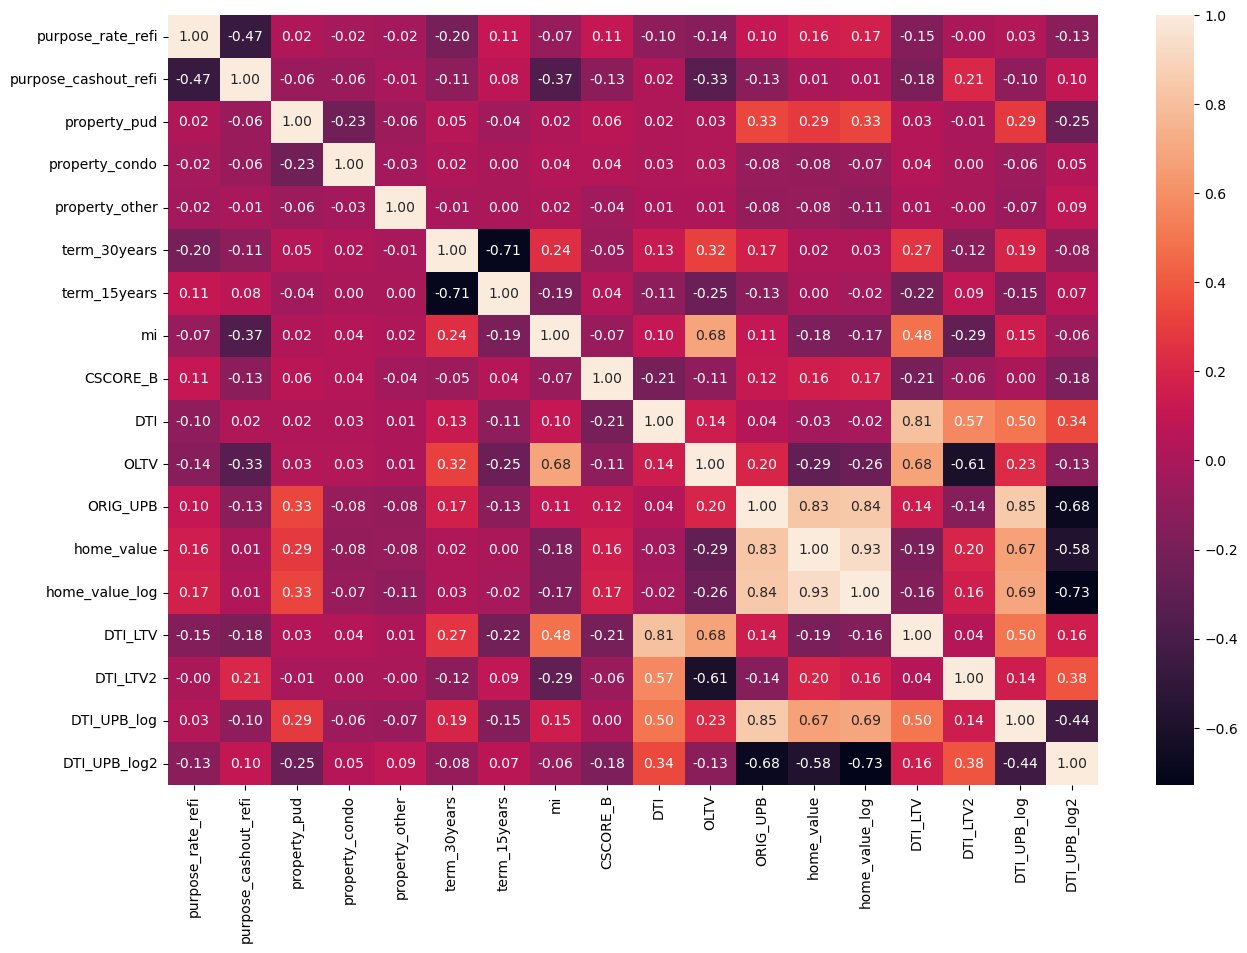

In [40]:
# visualize the correlation
fig=plt.figure(figsize=(15,10))
sns.heatmap(df_select[df_select['seg']=='mod'][X].corr(), annot=True, fmt=".2f")

#### We will remove the following variables:
* home_value
* home_value_log
* DTI_LTV
* DTI_UPB_log

In [53]:
# Get the new list of features we need.
X=['purpose_rate_refi', 'purpose_cashout_refi', 'property_pud', 'property_condo', 'property_other',
   'term_30years', 'term_15years', 'mi', 'CSCORE_B', 'DTI', 'OLTV', 'ORIG_UPB_log', 'home_value',
   'DTI_LTV', 'DTI_LTV2', 'DTI_UPB_log','DTI_UPB_log2']

# Training set.
X_train = copy.deepcopy(df_select[df_select['seg']=='mod'][X])
y_train = copy.deepcopy(df_select[df_select['seg']=='mod'][target])

# Test set.
X_test  = copy.deepcopy(df_select[df_select['seg']=='val'][X])
y_test  = copy.deepcopy(df_select[df_select['seg']=='val'][target])

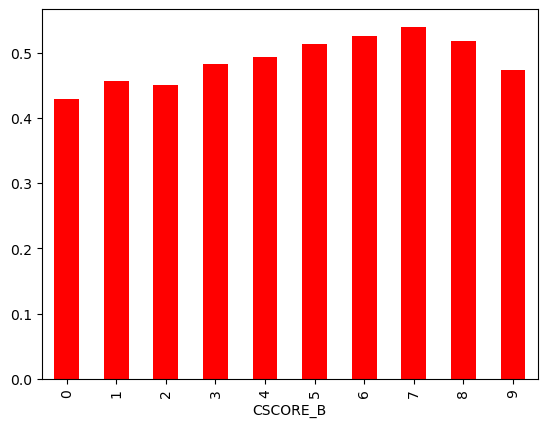

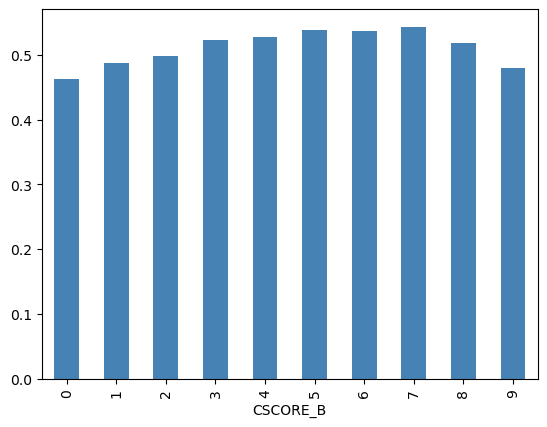

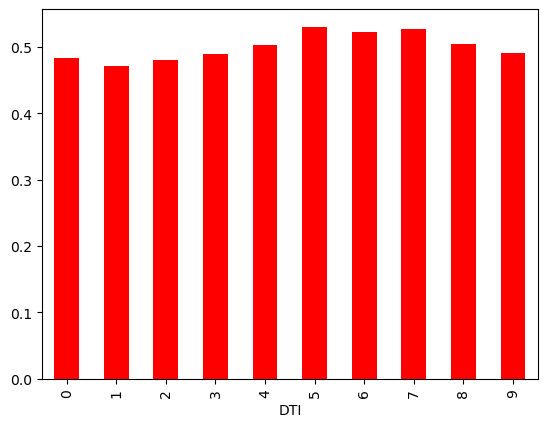

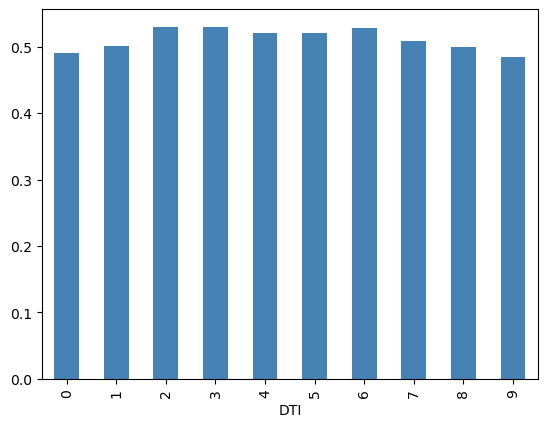

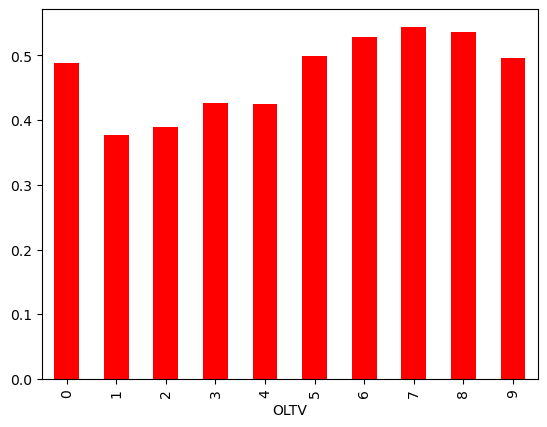

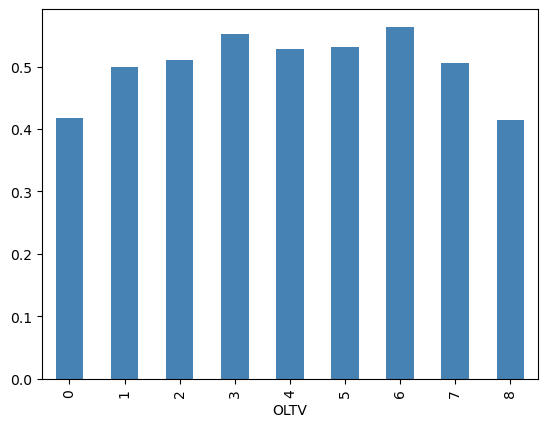

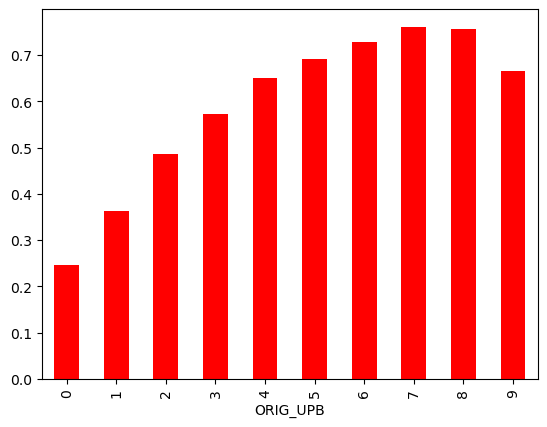

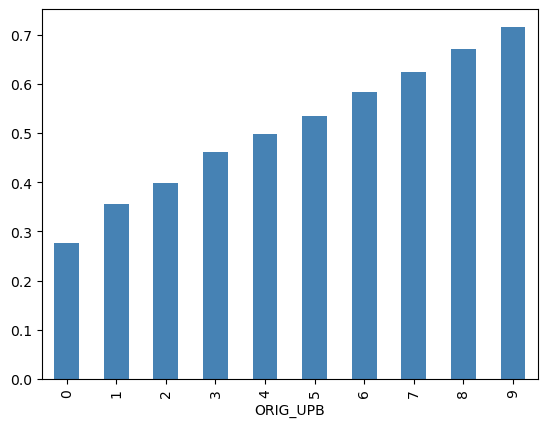

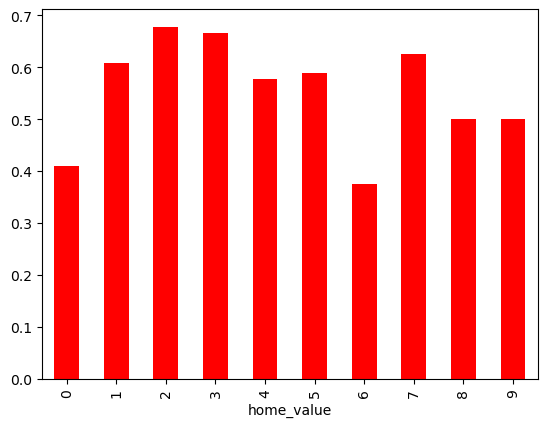

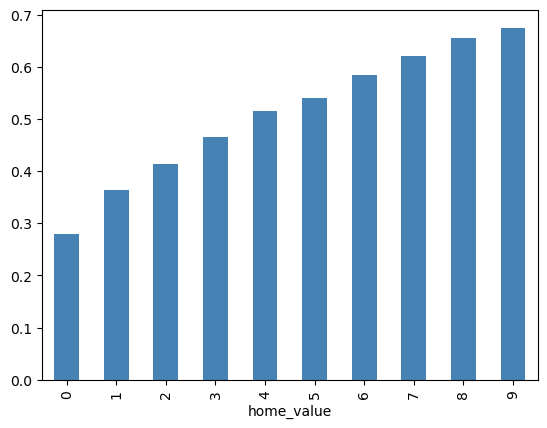

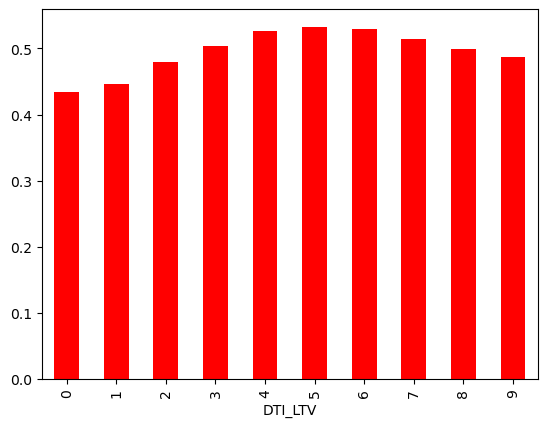

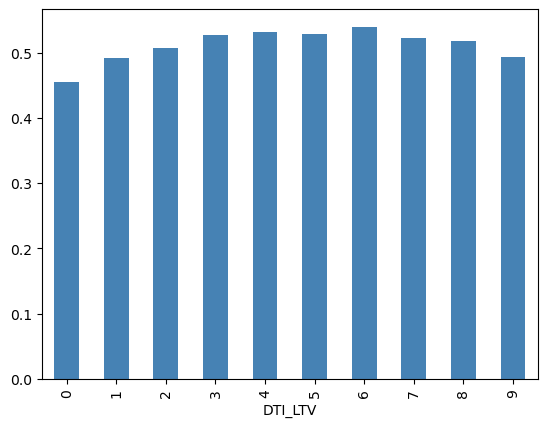

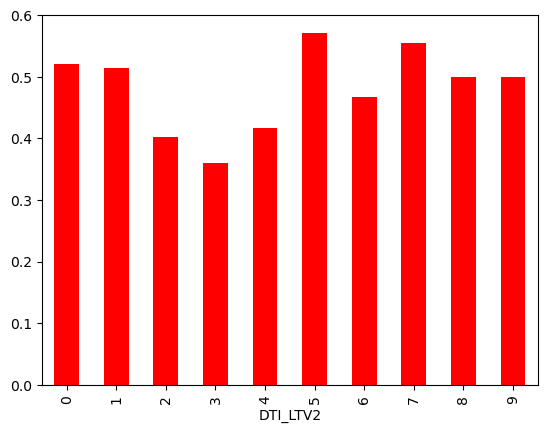

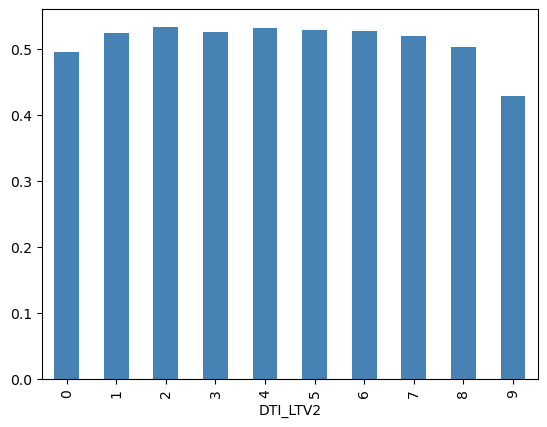

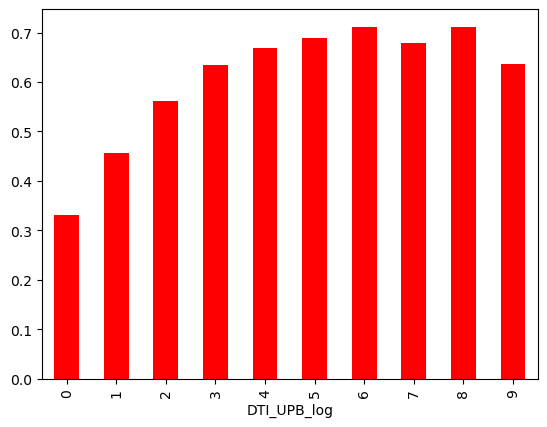

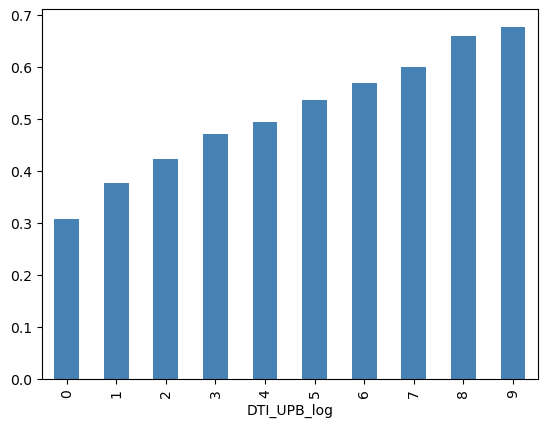

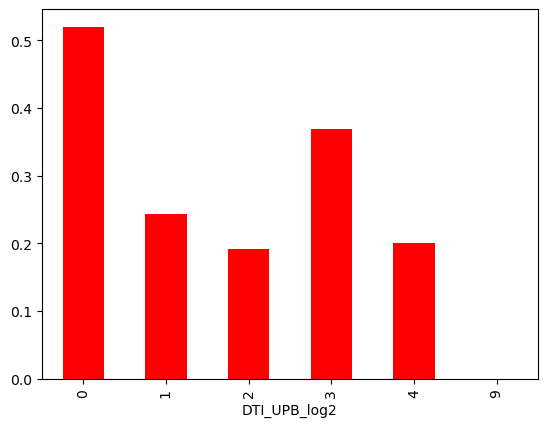

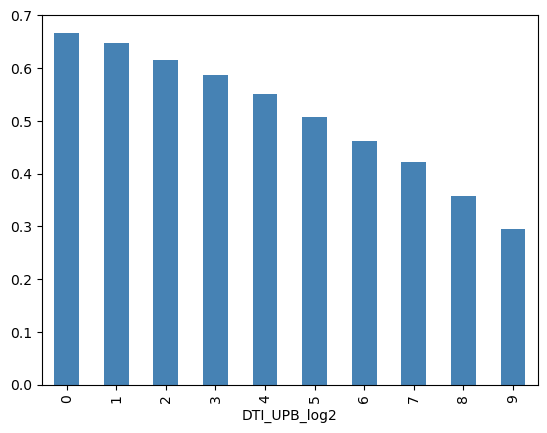

In [54]:
# Take out the modeling sample.
samp_mod = copy.deepcopy(df_select[df_select['seg']=='mod'])

# Define a function to explore the data pattern. 
def explore_numeric(x):
    # cut x into 10 bins according to its value
    samp_mod['value_ranks'] = pd.cut(samp_mod[x], 10, labels=False)
    # print(samp_mod.groupby(['value_ranks']).size())
    # print(samp_mod[x].groupby(samp_mod['value_ranks']).mean())
    samp_mod[target].groupby(samp_mod['value_ranks']).mean().plot(kind='bar', color='red')
    plt.xlabel(x)
    plt.show()
    
    # cut x into 10 evenly distributed bins
    samp_mod['dist_ranks'] = pd.qcut(samp_mod[x], 10, labels=False, duplicates="drop")
    # print(samp_mod.groupby(['dist_ranks']).size())
    # print(samp_mod[x].groupby(samp_mod['dist_ranks']).mean())
    samp_mod[target].groupby(samp_mod['dist_ranks']).mean().plot(kind='bar', color='steelblue')
    plt.xlabel(x)
    plt.show()

explore_numeric('CSCORE_B')
explore_numeric('DTI')
explore_numeric('OLTV')
explore_numeric('ORIG_UPB')
explore_numeric('home_value')
explore_numeric('DTI_LTV')
explore_numeric('DTI_LTV2')
explore_numeric('DTI_UPB_log')
explore_numeric('DTI_UPB_log2')

In [55]:
df_select.groupby('seg')['LOAN_ID'].count()

seg
mod    62913
val    41958
Name: LOAN_ID, dtype: int64

In [56]:
X_train[X].describe().T

,count,mean,std,min,25%,50%,75%,max
purpose_rate_refi,62913.0,3.905711e-01,4.878823e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
purpose_cashout_refi,62913.0,2.537472e-01,4.351581e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
property_pud,62913.0,3.151336e-01,4.645728e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
property_condo,62913.0,1.012986e-01,3.017261e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
property_other,62913.0,6.532831e-03,8.056213e-02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
term_30years,62913.0,7.423108e-01,4.373654e-01,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
term_15years,62913.0,1.475212e-01,3.546275e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
mi,62913.0,2.835980e-01,4.507476e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
CSCORE_B,62913.0,7.567429e+02,4.230997e+01,620.000000,7.290000e+02,7.660000e+02,7.910000e+02,8.320000e+02
DTI,62913.0,3.420419e+01,9.580214e+00,1.000000,2.700000e+01,3.500000e+01,4.200000e+01,5.000000e+01


##### 1) logistic regression

Accuracy: 0.607
Precision: 0.608
Recall: 0.638
              precision    recall  f1-score   support

           0       0.61      0.58      0.59     20681
           1       0.61      0.64      0.62     21277

    accuracy                           0.61     41958
   macro avg       0.61      0.61      0.61     41958
weighted avg       0.61      0.61      0.61     41958

Baseline: ROC AUC = 0.500
Logistic Regression - Default: ROC AUC = 0.645


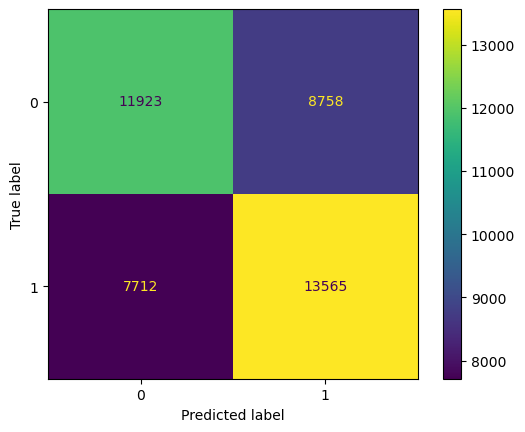

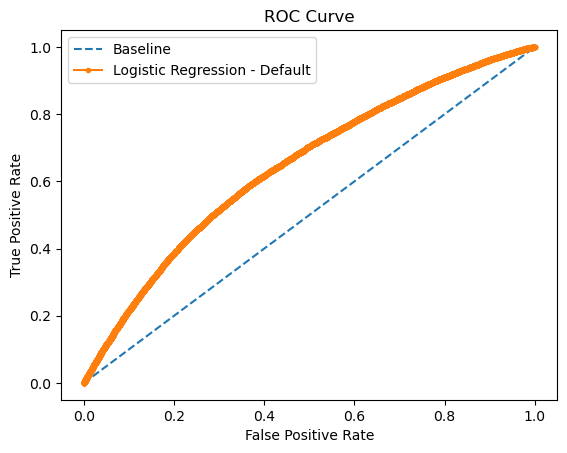

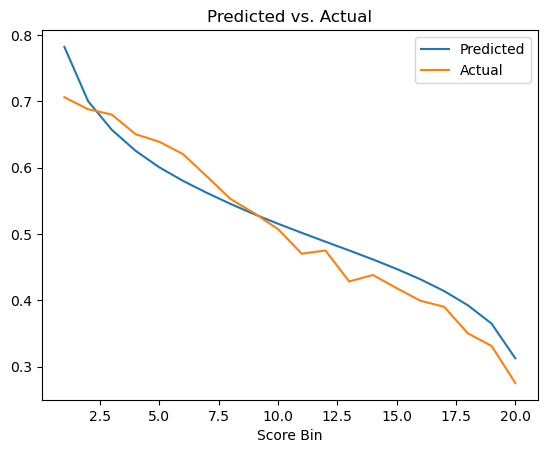

In [57]:
model=LogisticRegression()
model.fit(X_train, y_train)
preds=model.predict(X_test)
probs=model.predict_proba(X_test)
actuals=y_test.reset_index(drop=True)
model_name='Logistic Regression - Default'

LR=model_evaluation()

##### 2) Decision Tree

Accuracy: 0.619
Precision: 0.617
Recall: 0.658
              precision    recall  f1-score   support

           0       0.62      0.58      0.60     20681
           1       0.62      0.66      0.64     21277

    accuracy                           0.62     41958
   macro avg       0.62      0.62      0.62     41958
weighted avg       0.62      0.62      0.62     41958

Baseline: ROC AUC = 0.500
Decision Tree - Default: ROC AUC = 0.658


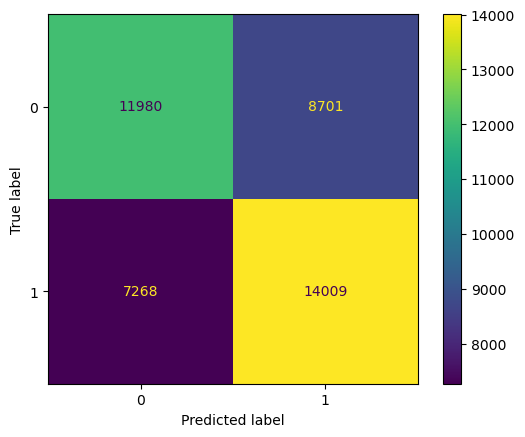

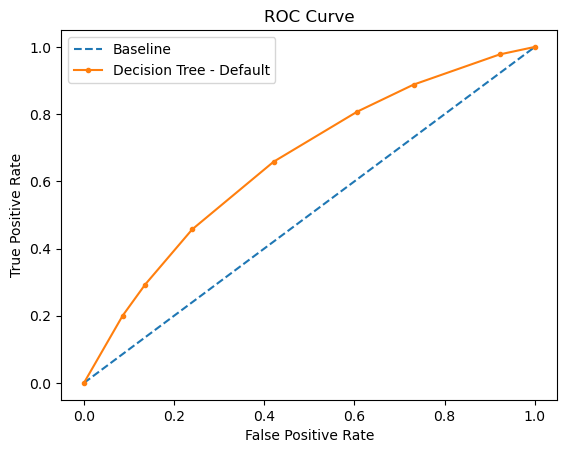

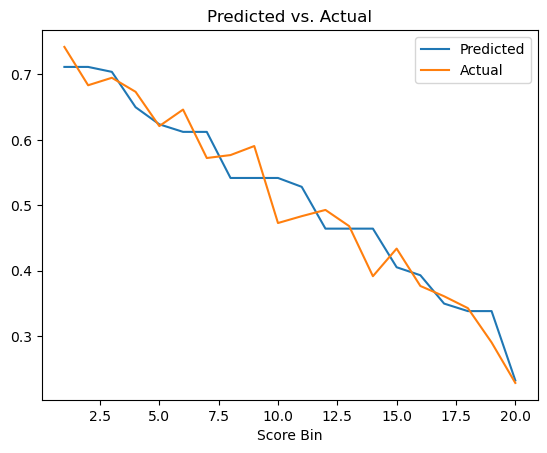

In [58]:
model=DecisionTreeClassifier(max_depth=3, random_state=101, max_features=None, min_samples_leaf=3)
model.fit(X_train, y_train)
preds=model.predict(X_test)
probs=model.predict_proba(X_test)
actuals=y_test.reset_index(drop=True)
model_name='Decision Tree - Default'

DT=model_evaluation()

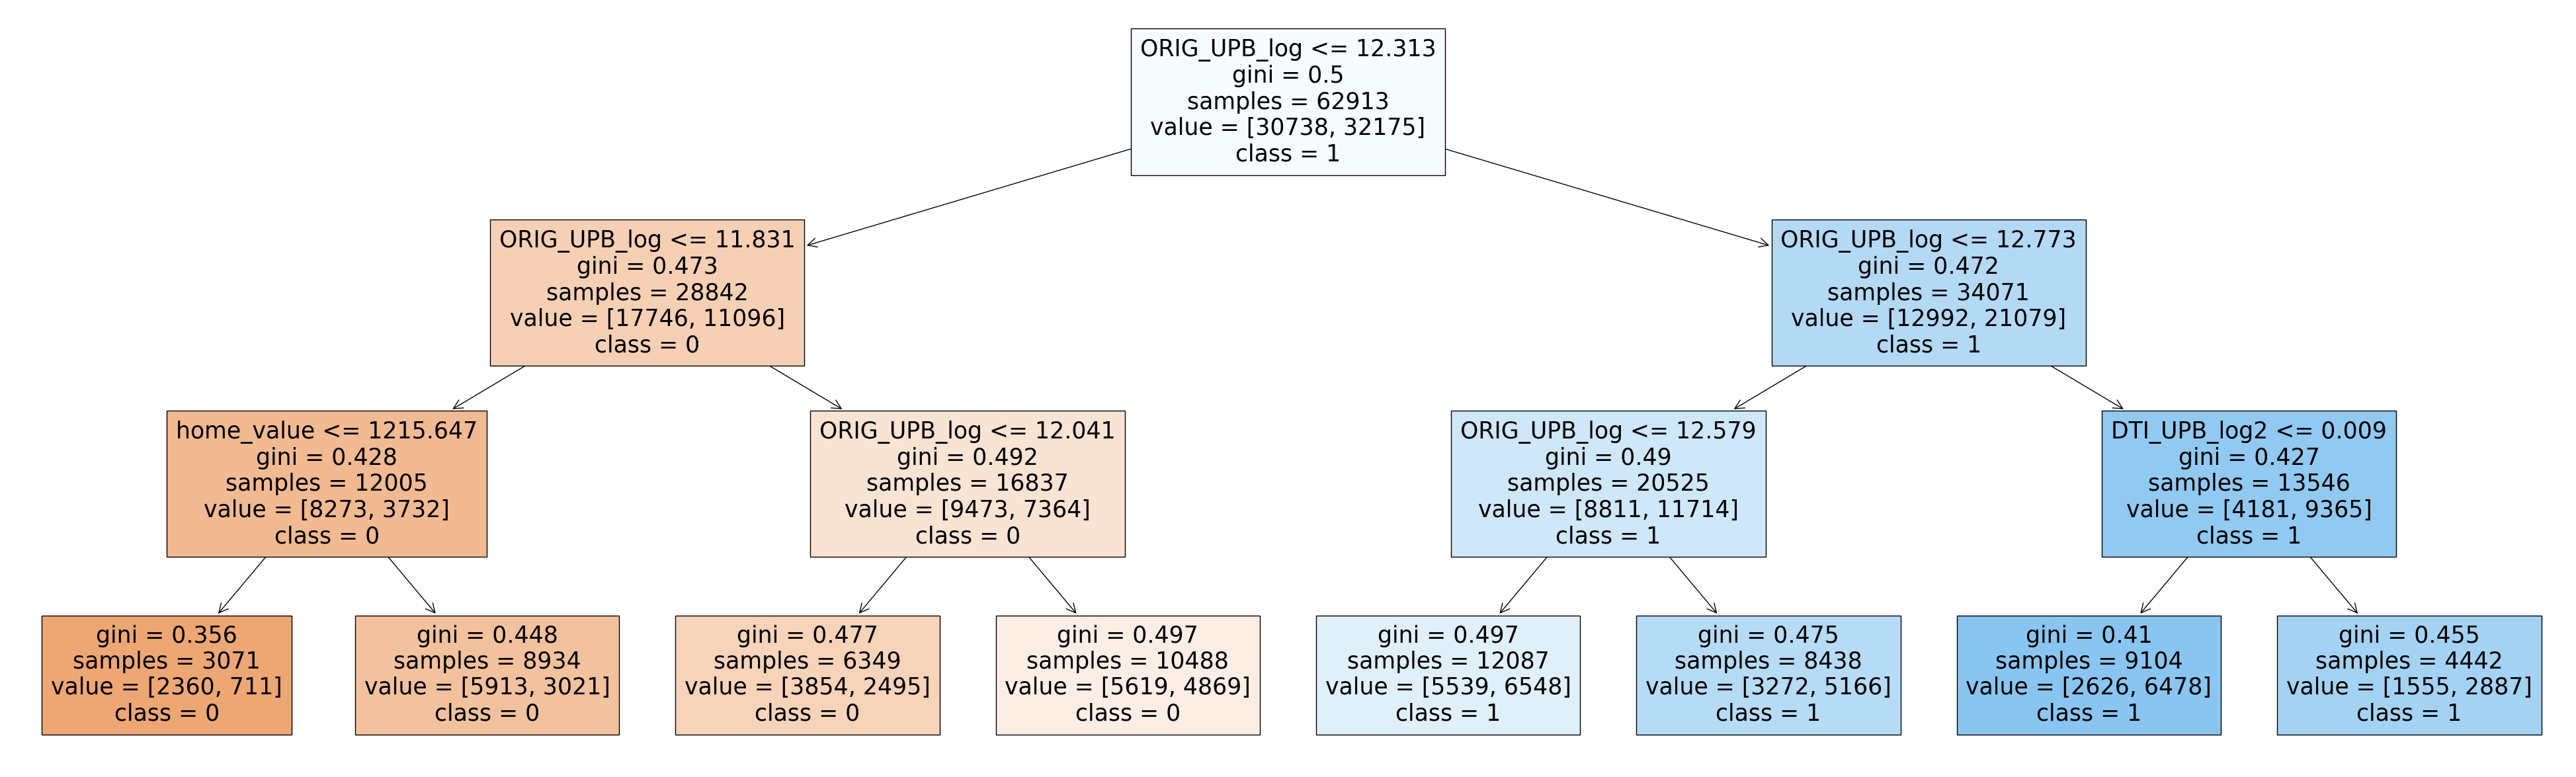

In [59]:
# Let's print out the tree.
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model=DecisionTreeClassifier(max_depth=3, random_state=101, max_features=None, min_samples_leaf=3)
model=model.fit(X_train, y_train)

fig=plt.figure(figsize=(50, 15))
_ =tree.plot_tree(model, 
                  feature_names=X_train.columns, 
                  class_names=['0', '1'], filled=True)

##### 3) Naive Bayes

Accuracy: 0.606
Precision: 0.639
Recall: 0.512
              precision    recall  f1-score   support

           0       0.58      0.70      0.64     20681
           1       0.64      0.51      0.57     21277

    accuracy                           0.61     41958
   macro avg       0.61      0.61      0.60     41958
weighted avg       0.61      0.61      0.60     41958

Baseline: ROC AUC = 0.500
Naive Bayes - Default: ROC AUC = 0.652


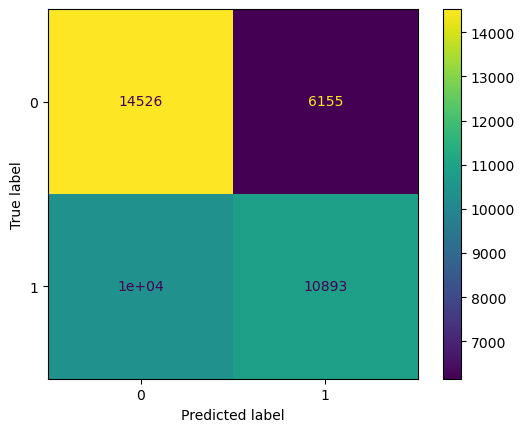

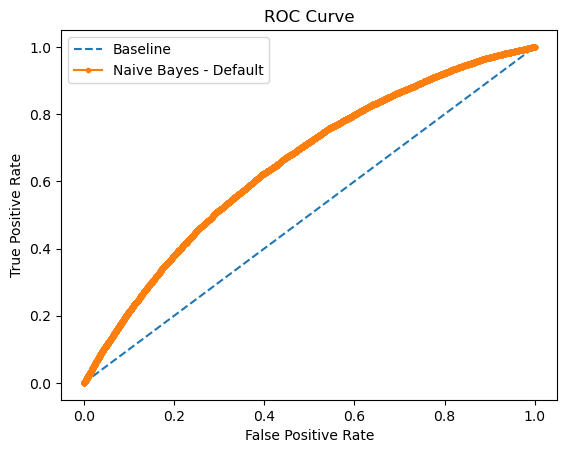

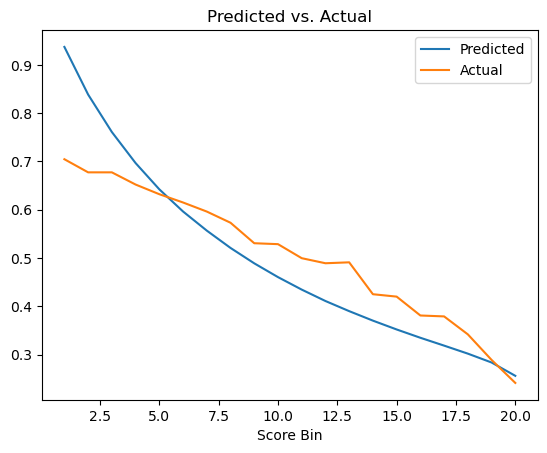

In [60]:
model=GaussianNB()
model.fit(X_train, y_train)
preds=model.predict(X_test)
probs=model.predict_proba(X_test)
actuals=y_test.reset_index(drop=True)
model_name='Naive Bayes - Default'

NB=model_evaluation()

##### 5) K Nearest Neighborhood (KNN)

In [76]:
accurancies = []
for i in range(1, 21):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    preds=model.predict(X_test)
    probs=model.predict_proba(X_test)
    accuracy_knn = accuracy_score(y_test, preds)
    accurancies.append(accuracy_knn)
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


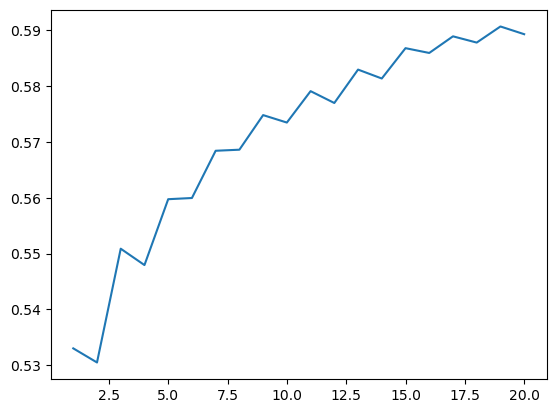

In [79]:
num_neighbors = np.arange(1,21)
accurancies   = np.array(accurancies)
plt.plot(num_neighbors, accurancies)

Accuracy: 0.591
Precision: 0.592
Recall: 0.623
              precision    recall  f1-score   support

           0       0.59      0.56      0.57     20681
           1       0.59      0.62      0.61     21277

    accuracy                           0.59     41958
   macro avg       0.59      0.59      0.59     41958
weighted avg       0.59      0.59      0.59     41958

Baseline: ROC AUC = 0.500
KNN - Default: ROC AUC = 0.619


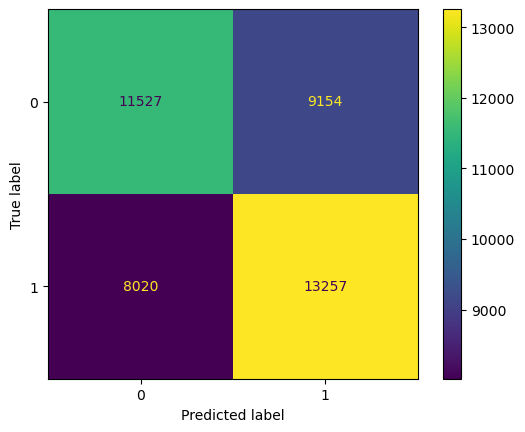

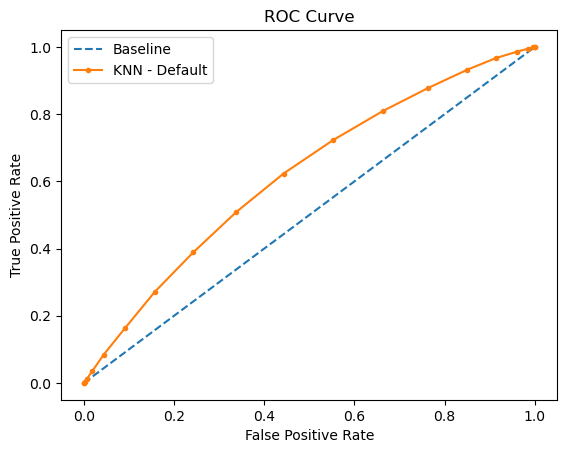

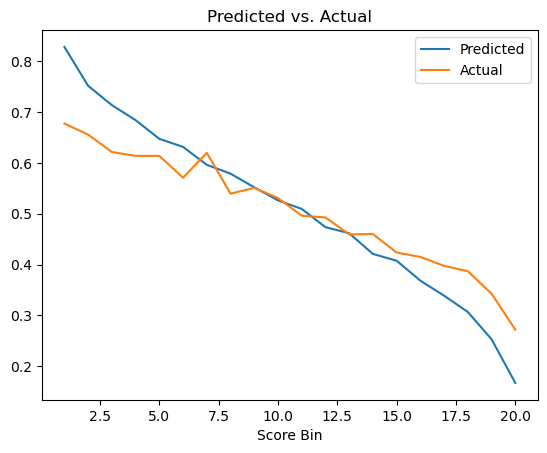

In [83]:
model=KNeighborsClassifier(n_neighbors=19)
model.fit(X_train, y_train)
preds=model.predict(X_test)
probs=model.predict_proba(X_test)
actuals=y_test.reset_index(drop=True)
model_name='KNN - Default'

KNN=model_evaluation()

#### 6) Light Gradint Boosting

Accuracy: 0.626
Precision: 0.622
Recall: 0.667
              precision    recall  f1-score   support

           0       0.63      0.58      0.61     20681
           1       0.62      0.67      0.64     21277

    accuracy                           0.63     41958
   macro avg       0.63      0.63      0.63     41958
weighted avg       0.63      0.63      0.63     41958

Baseline: ROC AUC = 0.500
Light Gradient Boosting - Default: ROC AUC = 0.671


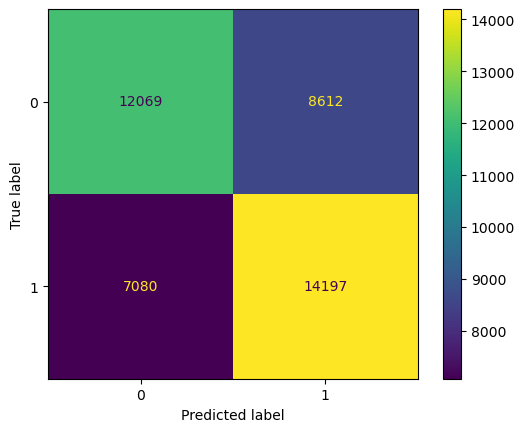

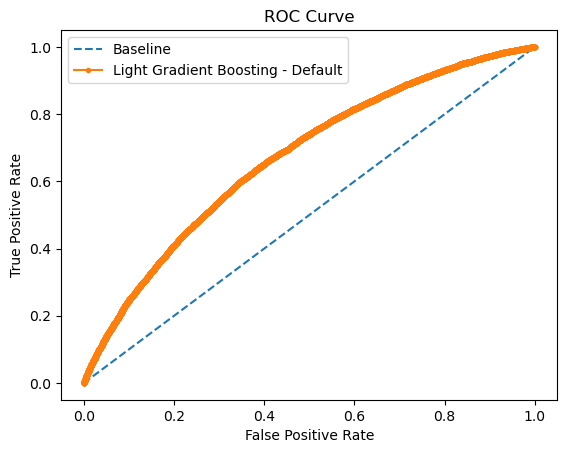

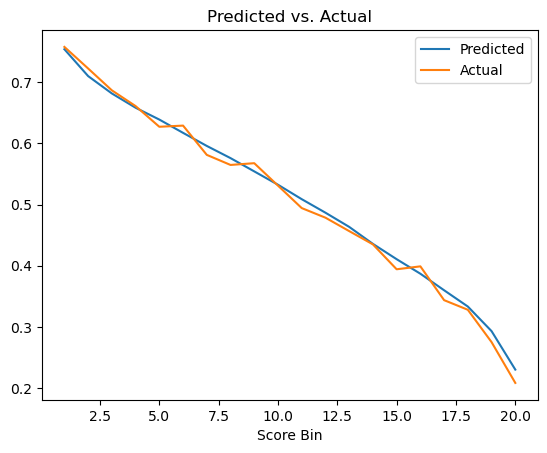

In [86]:
model=GradientBoostingClassifier()
model.fit(X_train, y_train)
preds=model.predict(X_test)
probs=model.predict_proba(X_test)
actuals=y_test.reset_index(drop=True)
model_name='Light Gradient Boosting - Default'

LGB=model_evaluation()

Accuracy: 0.616
Precision: 0.613
Recall: 0.658
              precision    recall  f1-score   support

           0       0.62      0.57      0.59     20681
           1       0.61      0.66      0.63     21277

    accuracy                           0.62     41958
   macro avg       0.62      0.62      0.61     41958
weighted avg       0.62      0.62      0.62     41958

Baseline: ROC AUC = 0.500
XGBoost - Default: ROC AUC = 0.655


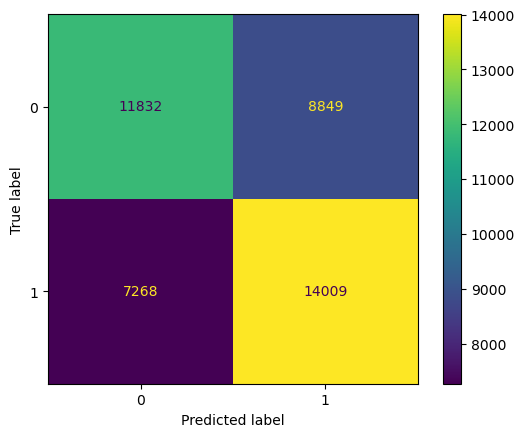

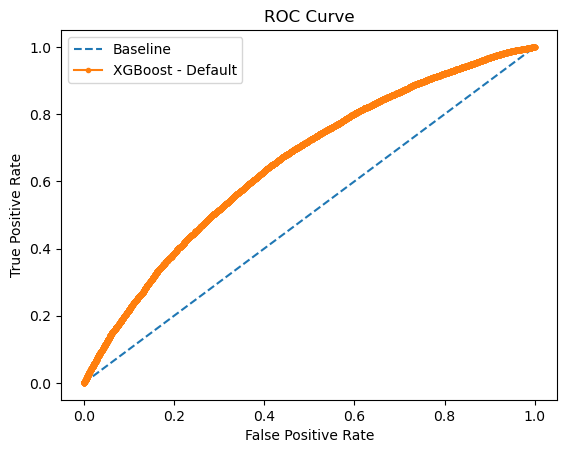

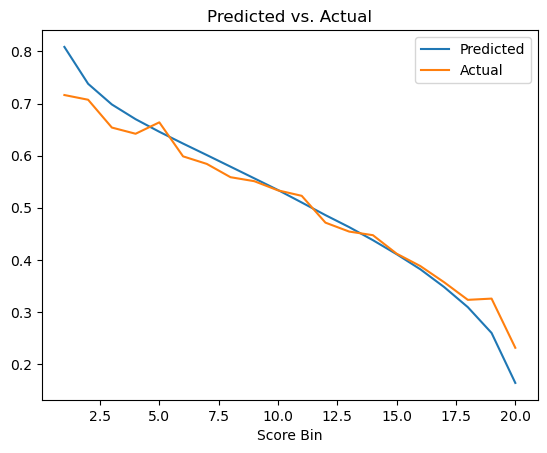

In [85]:
# 7) XGboost
model=XGBClassifier()
model.fit(X_train, y_train)
preds=model.predict(X_test)
probs=model.predict_proba(X_test)
actuals=y_test.reset_index(drop=True)
model_name='XGBoost - Default'

XGB=model_evaluation()

In [51]:
# 8) SVM of SVC
#from sklearn.svm import SVC

#model=SVC(probability=True)
#modelname='SVM'

#model.fit(X_train, y_train)

#preds=model.predict(X_test)
#probs=model.predict_proba(X_test)
#actuals=y_test.reset_index(drop=True)
#model_name='SVM - Default'

#SVM=model_evaluation()

Accuracy: 0.592
Precision: 0.595
Recall: 0.612
              precision    recall  f1-score   support

           0       0.59      0.57      0.58     20681
           1       0.60      0.61      0.60     21277

    accuracy                           0.59     41958
   macro avg       0.59      0.59      0.59     41958
weighted avg       0.59      0.59      0.59     41958

Baseline: ROC AUC = 0.500
Random Forest - Default: ROC AUC = 0.628


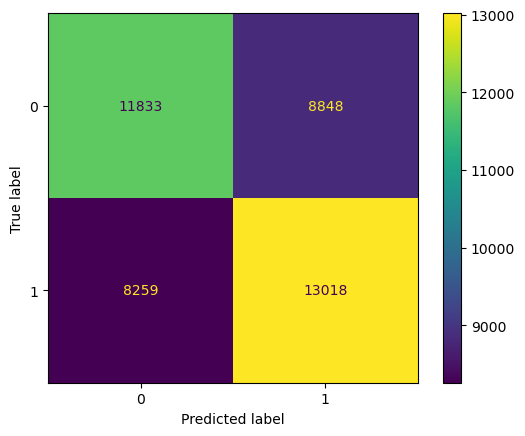

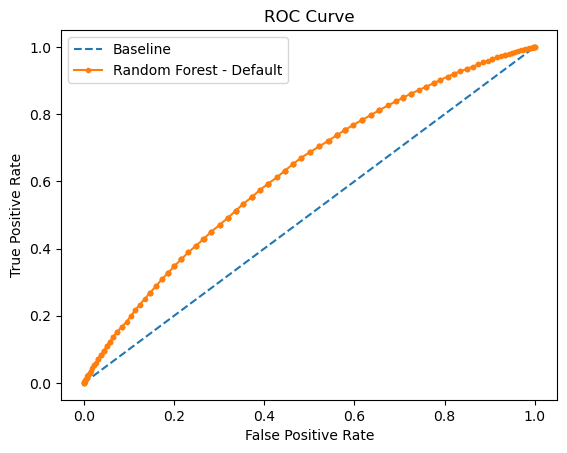

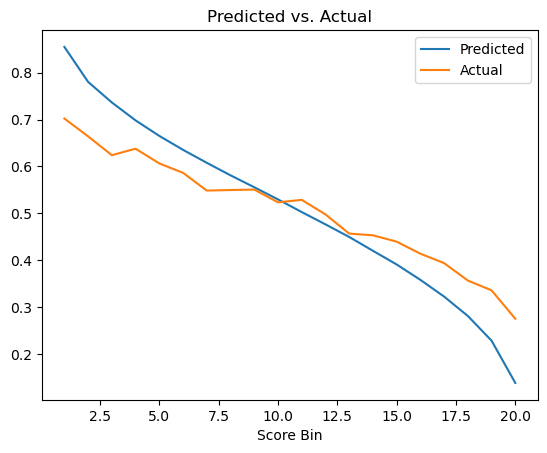

In [64]:
# 8) Random Forest
model=RandomForestClassifier()
model.fit(X_train, y_train)
preds=model.predict(X_test)
probs=model.predict_proba(X_test)
actuals=y_test.reset_index(drop=True)
model_name='Random Forest - Default'

RF=model_evaluation()

Accuracy: 0.588
Precision: 0.566
Recall: 0.800
              precision    recall  f1-score   support

           0       0.64      0.37      0.47     20681
           1       0.57      0.80      0.66     21277

    accuracy                           0.59     41958
   macro avg       0.60      0.58      0.57     41958
weighted avg       0.60      0.59      0.57     41958

Baseline: ROC AUC = 0.500
Ensemble Learning - Weighted Average: ROC AUC = 0.645


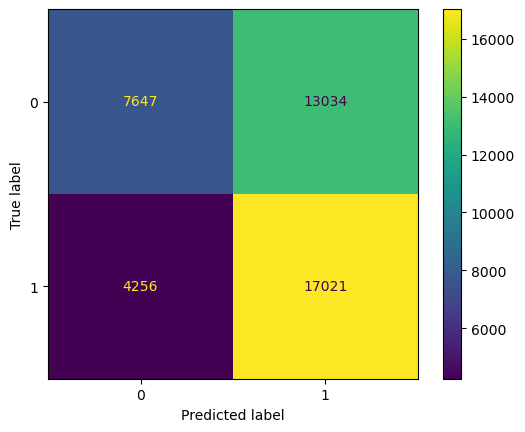

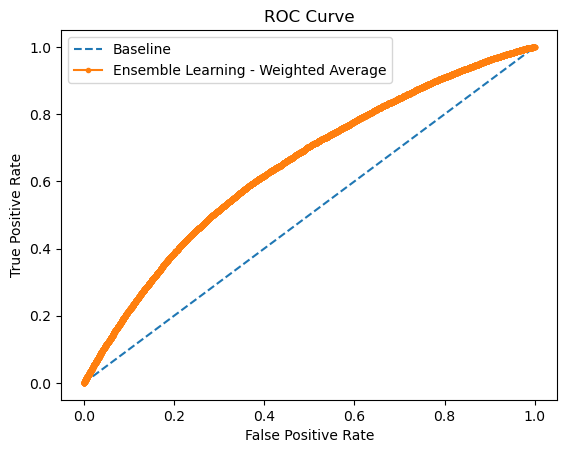

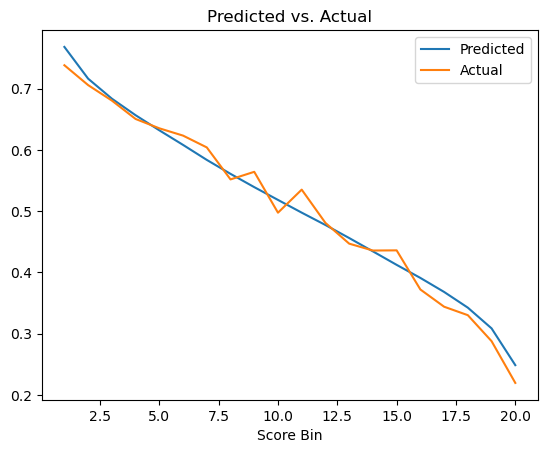

In [113]:
model_LR  = LogisticRegression()
model_DT  = DecisionTreeClassifier(max_depth = 3, random_state = 101, max_features = None, min_samples_leaf = 3)
model_NB  = GaussianNB()
model_KNN = KNeighborsClassifier(n_neighbors=15)
model_LGB = GradientBoostingClassifier()
model_XGB = XGBClassifier()
model_RF  = RandomForestClassifier()

# train the model with the modeling sample
model_LR.fit(X_train, y_train)
model_DT.fit(X_train, y_train)
model_NB.fit(X_train, y_train)
model_KNN.fit(X_train, y_train)
model_LGB.fit(X_train, y_train)
model_XGB.fit(X_train, y_train)
model_RF.fit(X_train, y_train)

# score the validation sample 
Prob_LR  = model_LR.predict_proba(X_test)
Prob_DT  = model_DT.predict_proba(X_test)
Prob_NB  = model_NB.predict_proba(X_test)
Prob_KNN = model_KNN.predict_proba(X_test)
Prob_LGB = model_LGB.predict_proba(X_test)
Prob_XGB = model_XGB.predict_proba(X_test)
Prob_RF  = model_RF.predict_proba(X_test)

# Use weight_exponent to reward the algorithms with higher ROC
weight_exponent = 2

w1 = LR**weight_exponent
w2 = DT**weight_exponent
w3 = NB**weight_exponent
w5 = KNN**weight_exponent
w6 = LGB**weight_exponent
w7 = XGB**weight_exponent
w8 = RF**weight_exponent

probs = (Prob_LR*w1 + Prob_DT*w2 + Prob_NB*w3 + Prob_KNN*w5 + Prob_LGB*w6 + Prob_XGB*w7 + Prob_RF*w8) /(w1+w2+w3+w5+w6+w7+w8)

actuals = y_test.reset_index(drop=True)
model_name = "Ensemble Learning - Weighted Average"

EL_weighted_average = model_evaluation()

In [114]:
# append prepayment score with LOAN ID
prepay_score = pd.DataFrame(probs, columns=['score1', 'score2']).reset_index()
LOAN_ID      = df_select[df_select['seg']=='val']['LOAN_ID'].reset_index()

prepay_file=pd.DataFrame({'LOAN_ID': LOAN_ID['LOAN_ID'], 'Predicted_prepay': prepay_score['score2']})
prepay_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41958 entries, 0 to 41957
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LOAN_ID           41958 non-null  int64  
 1   Predicted_prepay  41958 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 655.7 KB


In [115]:
prepay_file.head()

,LOAN_ID,Predicted_prepay
0,98836744,0.536365
1,98836862,0.372089
2,98836951,0.306317
3,98837067,0.659714
4,98837074,0.380975


### Step 8: Payment Default Model (bad rate model/risk model)
#### define the target

In [120]:
target='bad'

In [121]:
# Keep the features.
X=['purpose_rate_refi', 'purpose_cashout_refi', 'property_pud', 'property_condo', 'property_other',
   'term_30years', 'term_15years', 'mi', 'CSCORE_B', 'DTI', 'OLTV', 'ORIG_UPB', 'home_value', 'home_value_log',
   'DTI_LTV2', 'DTI_UPB_log2']

# Get training data.
X_train=df_select[df_select['seg']=='mod'][X]
y_train=df_select[df_select['seg']=='mod'][target]

# Get test set.
X_test=df_select[df_select['seg']=='val'][X]
y_test=df_select[df_select['seg']=='val'][target]

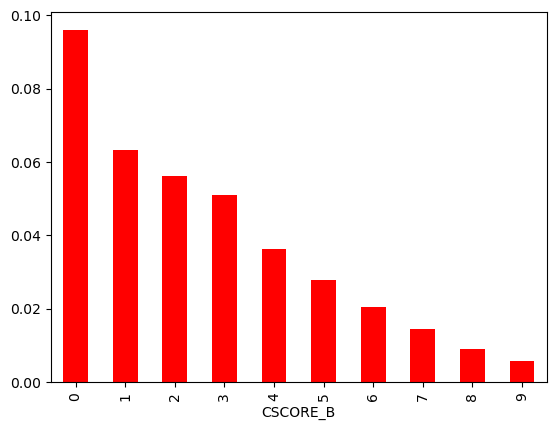

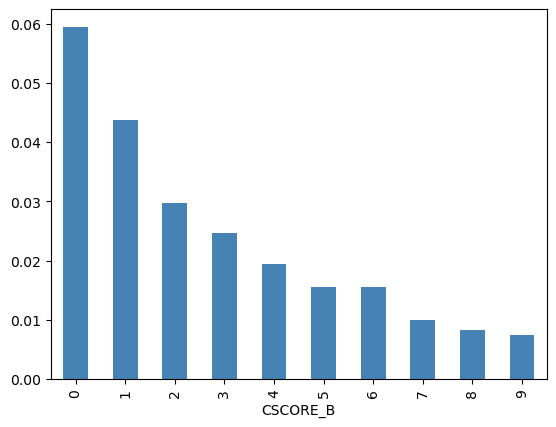

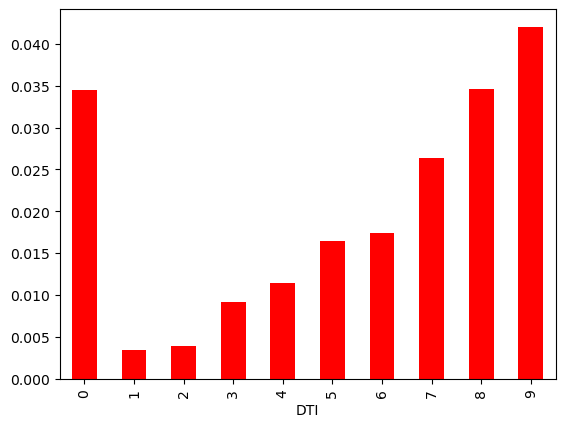

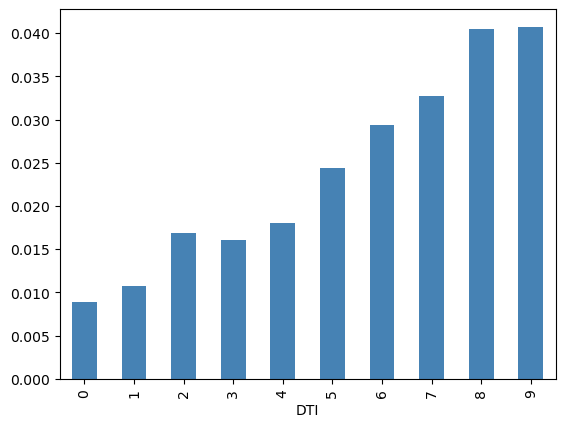

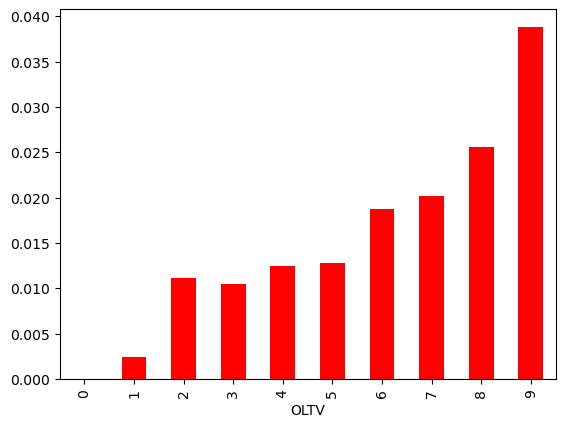

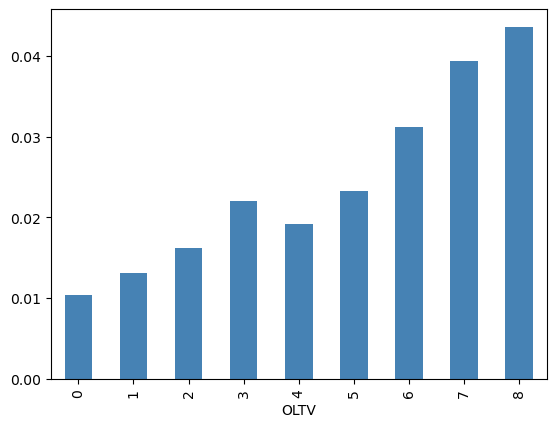

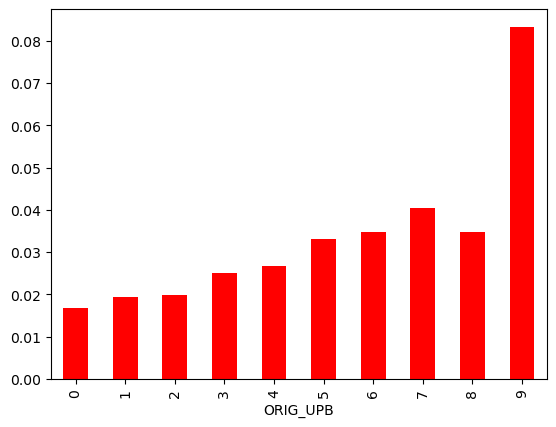

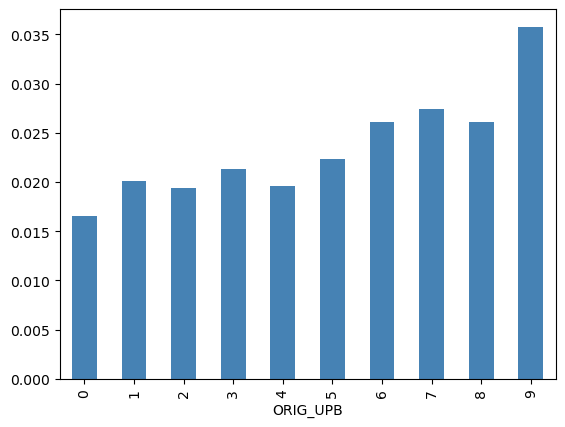

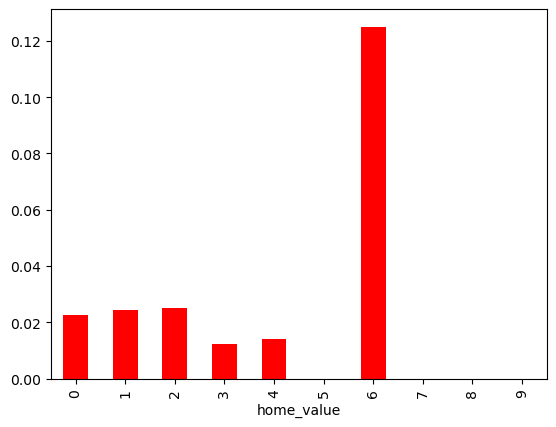

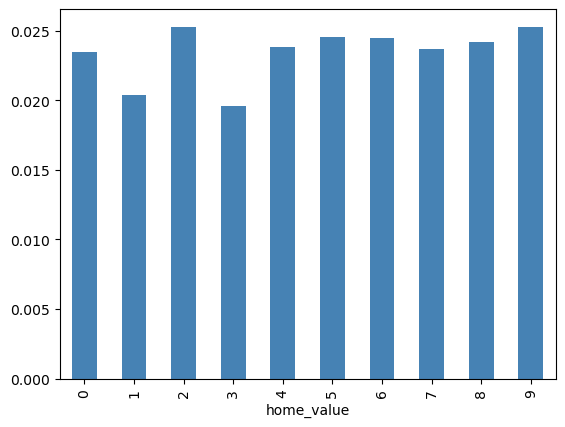

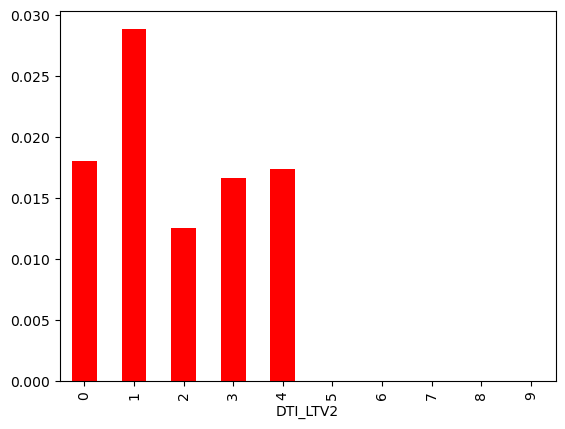

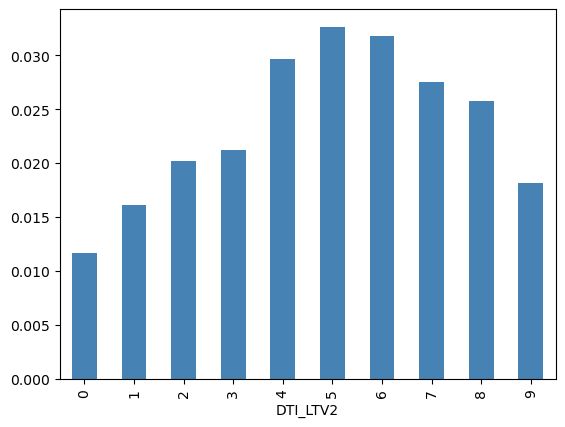

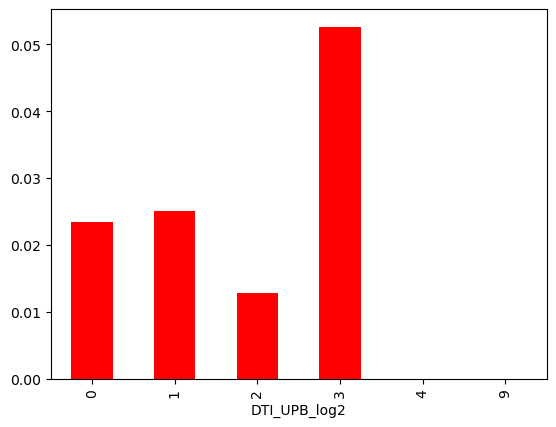

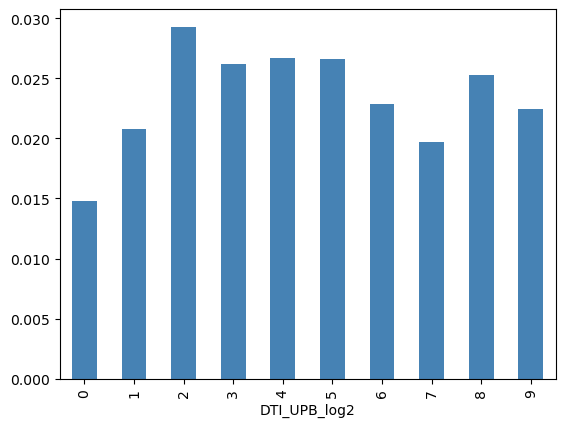

In [122]:
samp_mod= copy.deepcopy(df_select[df_select['seg']=='mod'])

def explore_numeric(x):
    # cut x into 10 bins according to its value
    samp_mod['value_ranks']=pd.cut(samp_mod[x], 10, labels=False)
    # print(samp_mod.groupby(['value_ranks']).size())
    # print(samp_mod[x].groupby(samp_mod['value_ranks']).mean())
    samp_mod[target].groupby(samp_mod['value_ranks']).mean().plot(kind='bar', color='red')
    plt.xlabel(x)
    plt.show()
    
    # cut x into 10 evenly distributed bins
    samp_mod['dist_ranks']=pd.qcut(samp_mod[x], 10, labels=False, duplicates="drop")
    # print(samp_mod.groupby(['dist_ranks']).size())
    # print(samp_mod[x].groupby(samp_mod['dist_ranks']).mean())
    samp_mod[target].groupby(samp_mod['dist_ranks']).mean().plot(kind='bar', color='steelblue')
    plt.xlabel(x)
    plt.show()

explore_numeric('CSCORE_B')
explore_numeric('DTI')
explore_numeric('OLTV')
explore_numeric('ORIG_UPB')
explore_numeric('home_value')
explore_numeric('DTI_LTV2')
explore_numeric('DTI_UPB_log2')

In [196]:
# now we construct a dataset where we undersample some of the negative sample while keeping all the positive sample
positive = copy.deepcopy(df_select[df_select['bad']==1])
negative = copy.deepcopy(df_select[df_select['bad']==0])
np.random.seed(1234)
ran_uniform = np.random.uniform(low=0.0, high=1.0, size=len(negative))
negative_select = copy.deepcopy(negative[ran_uniform>0])
negative_select
sub_df_select = pd.concat([positive,negative_select])
sub_df_select['bad'].value_counts()

0    102402
1      2469
Name: bad, dtype: int64

In [197]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE with a sampling strategy of 'minority'. SMOTE will create synthetic samples until 
# the number of samples in the minority class is equal to the number of samples in the majority class. 
# This helps balance the class distribution.
smote = SMOTE(sampling_strategy='minority')

x_arr = np.array(sub_df_select[X])
y_arr = np.array(sub_df_select[['bad']])
# Apply SMOTE oversampling on your data
#x = np.stack(x)
x_sm, y_sm = smote.fit_resample(x_arr, y_arr)

# get the train and test data
x_train, x_test, y_train, y_test=train_test_split(x_sm, y_sm, test_size=0.3, 
                                                  random_state=15, stratify=y_sm)

In [198]:
def model_evaluation():

    # Accuracy score.
    print('Accuracy: %.3f' % accuracy_score(y_test, preds))

    # Precision score - model precision score represents the model’s ability to correctly predict the positives 
    # out of all the positive predictions it made.
    print('Precision: %.3f' % precision_score(y_test, preds)) 

    # Recall score - model recall score represents the model’s ability to correctly predict the positives 
    # out of actual positives.
    print('Recall: %.3f' % recall_score(y_test, preds))
    
    print(classification_report(y_test, preds))

    # Confusion matrix.
    # plot_confusion_matrix(model, X_test, y_test)   
    cm   = confusion_matrix(y_test, preds, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()

    # ROC & AUC.
    # Generate a baseline prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]

    # Predict probabilities.
    lr_probs = model.predict_proba(x_test)

    # Keep probabilities for the positive outcome only.
    lr_probs = lr_probs[:, 1]

    # Calculate scores.
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)

    # Summarize scores.
    print('Baseline: ROC AUC = %.3f' % (ns_auc))
    print(model_name+': ROC AUC = %.3f' % (lr_auc))

    # Calculate roc curves.
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

    #P lot the roc curve for the model.
    plt.figure()
    plt.plot(ns_fpr, ns_tpr, linestyle = '--', label = 'Baseline')
    plt.plot(lr_fpr, lr_tpr, marker = '.', label = model_name)

    # Axis labels.
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.title("ROC Curve")
    plt.show()

    # Predicted vs. actual graphs
    actuals_y = pd.DataFrame(data = actuals, columns = [target])
    probs_y = pd.DataFrame(data = probs, columns = ['score1', 'score2'])
    actuals_probs = pd.concat([actuals_y, probs_y], axis = 1)
    num_bins = 20
    binlabels = list(range(0, num_bins))
    actuals_probs['score_bin'] = pd.qcut(actuals_probs['score2'].rank(method = 'first'), num_bins, labels = binlabels)
    actuals_probs['score_bin'] = num_bins - actuals_probs['score_bin'].astype(int)
    df_grp = actuals_probs.groupby('score_bin')['score2'].mean()
    df_grp.plot()
    df_grp2 = actuals_probs.groupby('score_bin')[target].mean()
    df_grp2.plot()
    plt.legend(["Predicted", "Actual"])
    plt.xlabel('Score Bin')
    plt.title("Predicted vs. Actual")
    
    # save AUC ROC and use it as the weight in the ensemble method later
    return(lr_auc)

Accuracy: 0.682
Precision: 0.669
Recall: 0.720
              precision    recall  f1-score   support

           0       0.70      0.64      0.67     30721
           1       0.67      0.72      0.69     30721

    accuracy                           0.68     61442
   macro avg       0.68      0.68      0.68     61442
weighted avg       0.68      0.68      0.68     61442

Baseline: ROC AUC = 0.500
Logistic Regression - Default: ROC AUC = 0.739


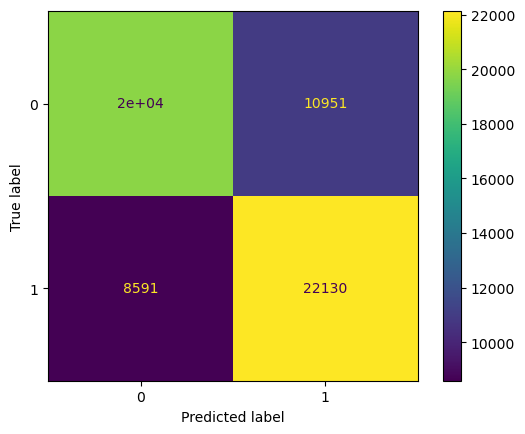

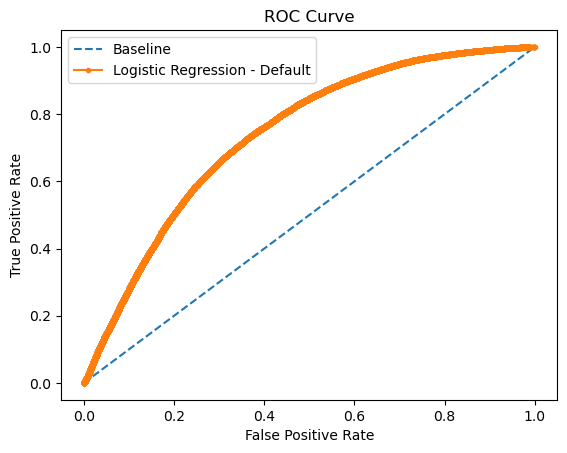

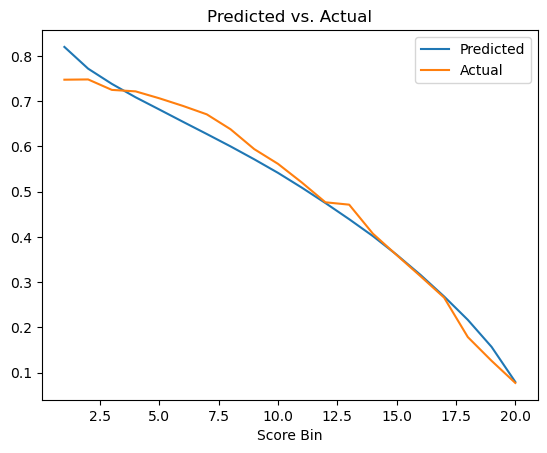

In [232]:
# 1) logistic regression
model=LogisticRegression()
model.fit(x_train, y_train)
preds=model.predict(x_test)
probs=model.predict_proba(x_test)
actuals=y_test
model_name='Logistic Regression - Default'

LR=model_evaluation()

Accuracy: 0.905
Precision: 0.957
Recall: 0.848
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     30721
           1       0.96      0.85      0.90     30721

    accuracy                           0.90     61442
   macro avg       0.91      0.90      0.90     61442
weighted avg       0.91      0.90      0.90     61442

Baseline: ROC AUC = 0.500
Decision Tree - Default: ROC AUC = 0.964


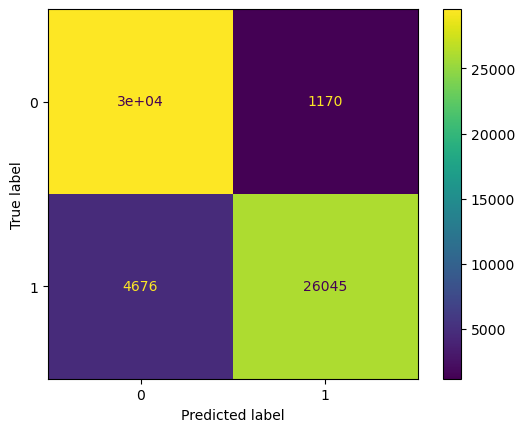

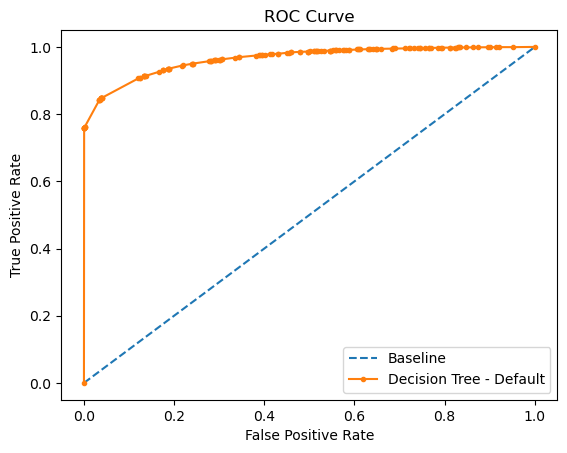

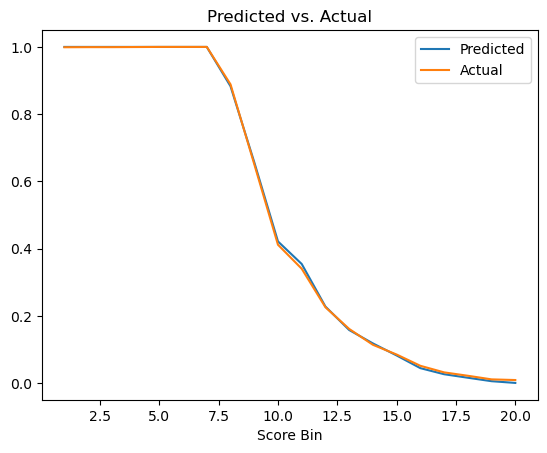

In [228]:
# 2) Decision Tree
model=DecisionTreeClassifier(max_depth=10, random_state=101, max_features=None, min_samples_leaf=3)
model.fit(x_train, y_train)
preds=model.predict(x_test)
probs=model.predict_proba(x_test)
actuals=y_test
model_name='Decision Tree - Default'

DT=model_evaluation()

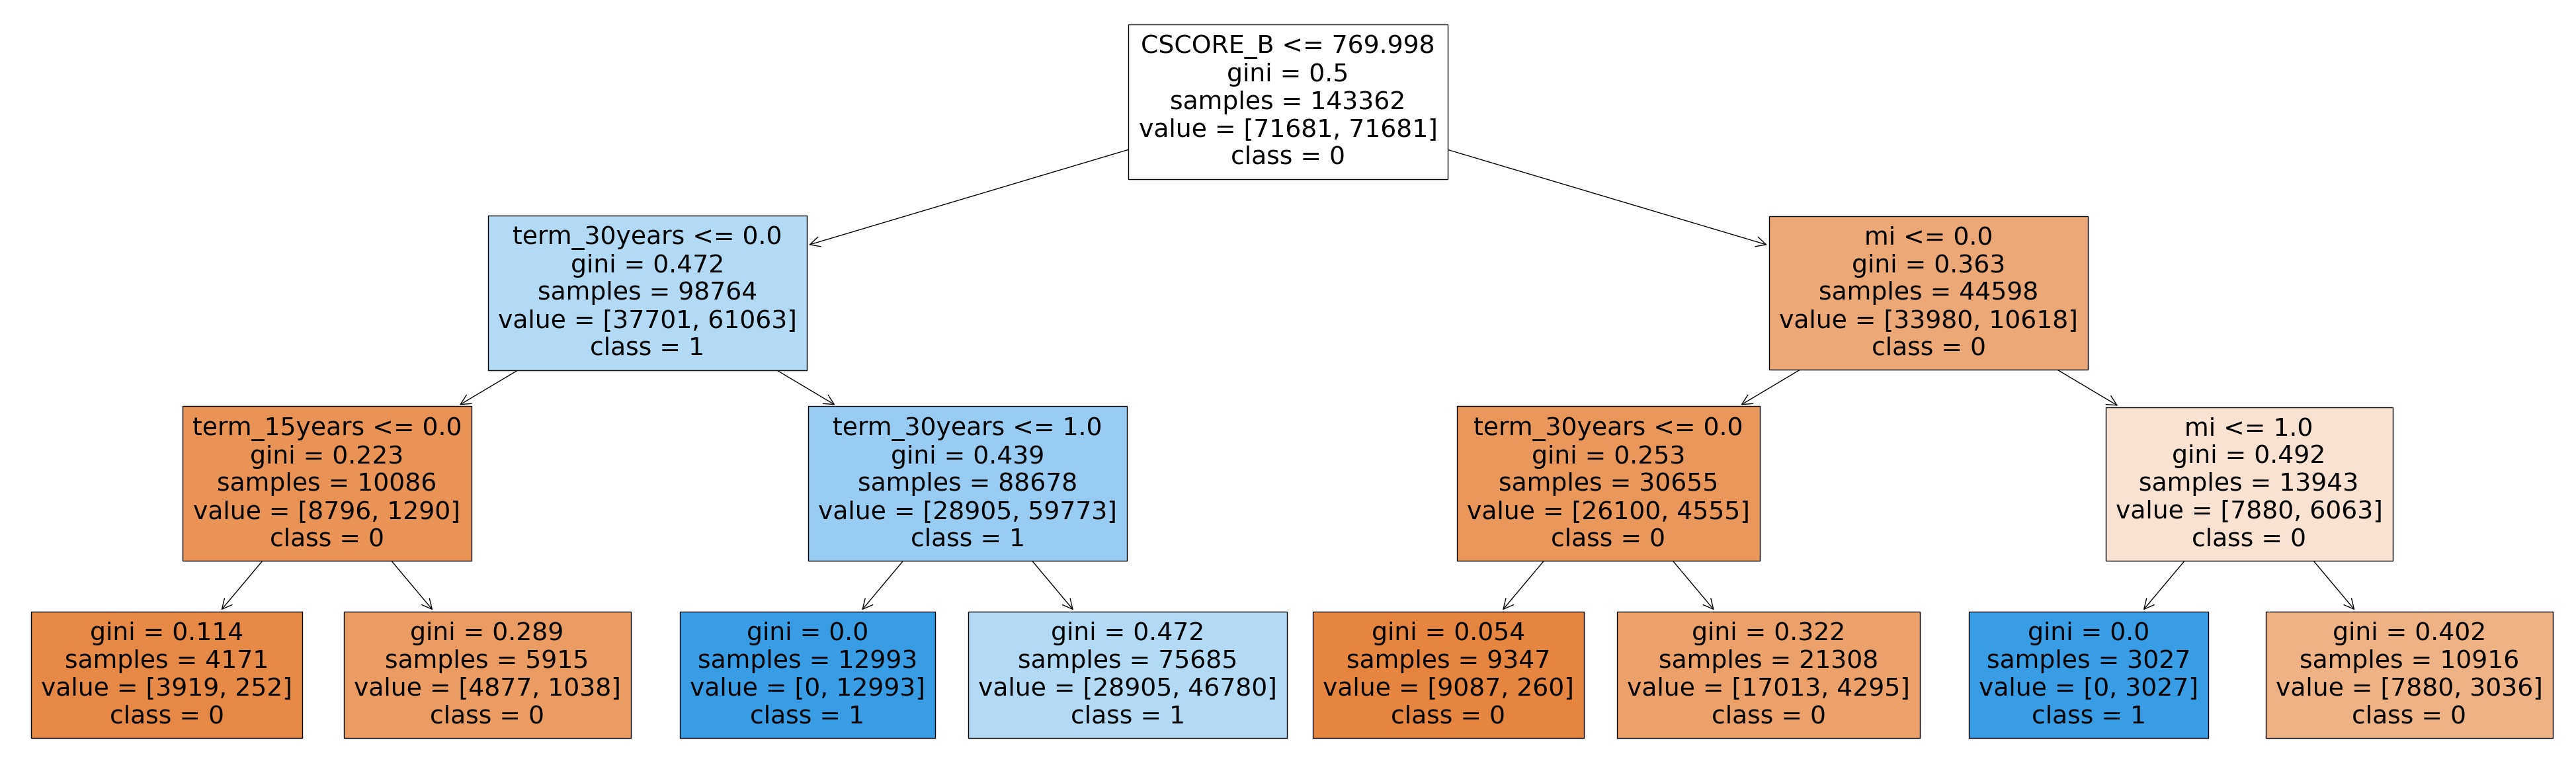

In [201]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model=DecisionTreeClassifier(max_depth=3, random_state=101, max_features=None, min_samples_leaf=3)
model=model.fit(x_train, y_train)

fig=plt.figure(figsize=(50, 15))
_ =tree.plot_tree(model, 
                  feature_names=X, 
                  class_names=['0', '1'], filled=True)

Accuracy: 0.703
Precision: 0.668
Recall: 0.808
              precision    recall  f1-score   support

           0       0.76      0.60      0.67     30721
           1       0.67      0.81      0.73     30721

    accuracy                           0.70     61442
   macro avg       0.71      0.70      0.70     61442
weighted avg       0.71      0.70      0.70     61442

Baseline: ROC AUC = 0.500
Naive Bayes - Default: ROC AUC = 0.763


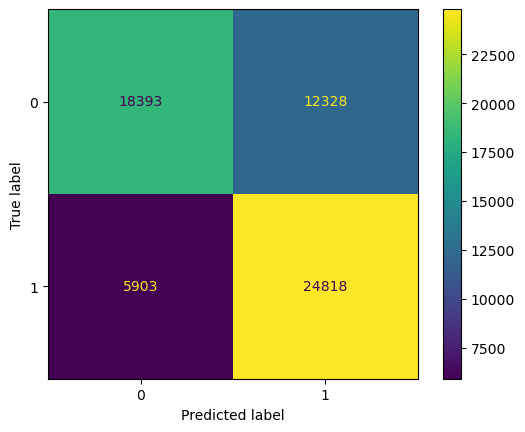

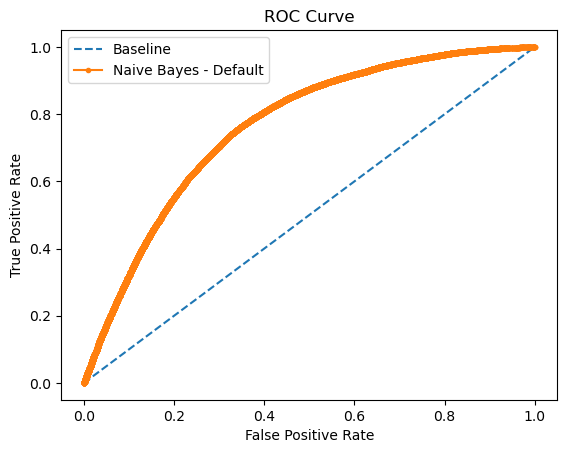

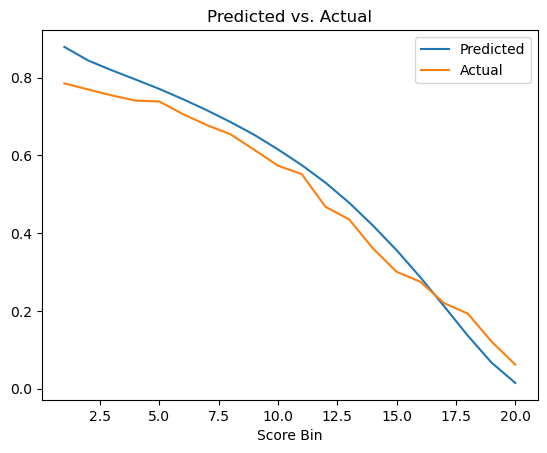

In [203]:
# 3) Naive Bayes
model=GaussianNB()
model.fit(x_train, y_train)
preds=model.predict(x_test)
probs=model.predict_proba(x_test)
actuals=y_test
model_name='Naive Bayes - Default'

NB=model_evaluation()

Accuracy: 0.807
Precision: 0.789
Recall: 0.838
              precision    recall  f1-score   support

           0       0.83      0.78      0.80     30721
           1       0.79      0.84      0.81     30721

    accuracy                           0.81     61442
   macro avg       0.81      0.81      0.81     61442
weighted avg       0.81      0.81      0.81     61442

Baseline: ROC AUC = 0.500
KNN - Default: ROC AUC = 0.893


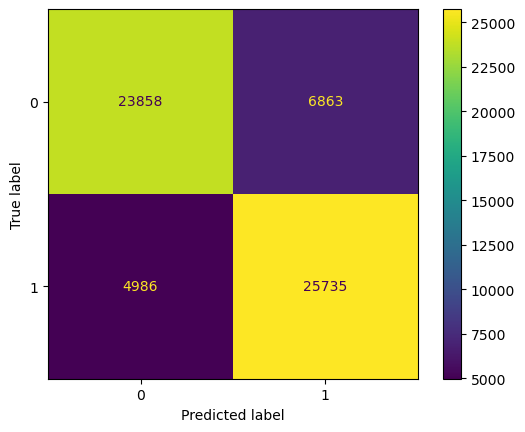

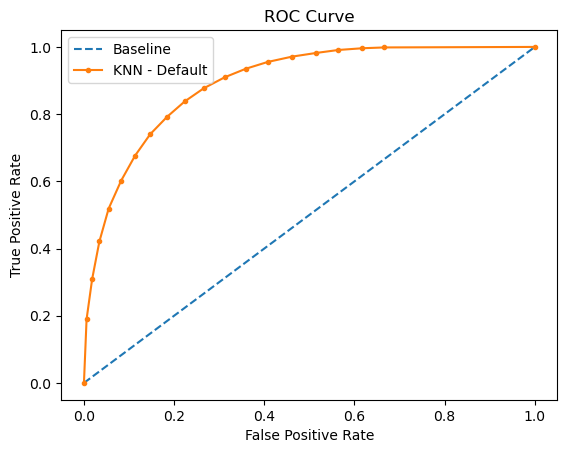

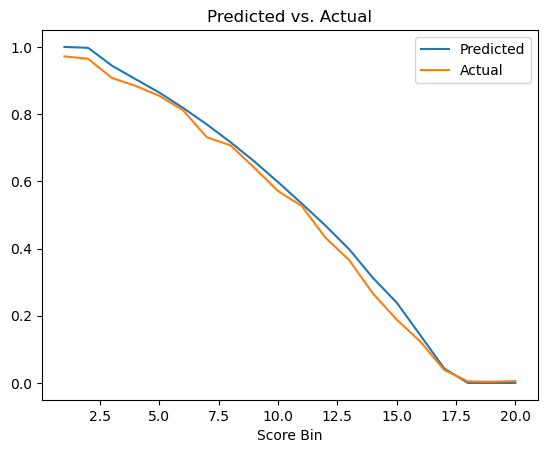

In [205]:
# 5) K Nearest Neighborhood (KNN)
model=KNeighborsClassifier(n_neighbors=18)
model.fit(x_train, y_train)
preds=model.predict(x_test)
probs=model.predict_proba(x_test)
actuals=y_test
model_name='KNN - Default'

KNN=model_evaluation()

Accuracy: 0.939
Precision: 0.984
Recall: 0.892
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     30721
           1       0.98      0.89      0.94     30721

    accuracy                           0.94     61442
   macro avg       0.94      0.94      0.94     61442
weighted avg       0.94      0.94      0.94     61442

Baseline: ROC AUC = 0.500
Light Gradient Boosting - Default: ROC AUC = 0.980


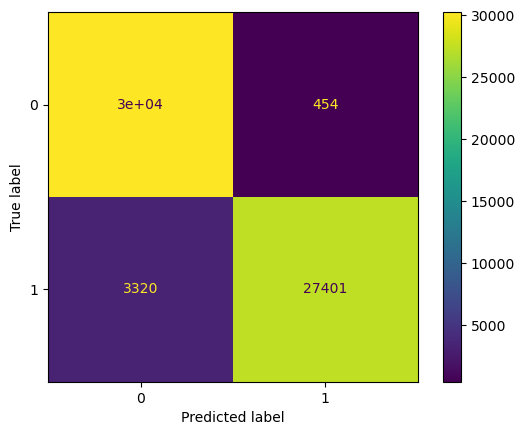

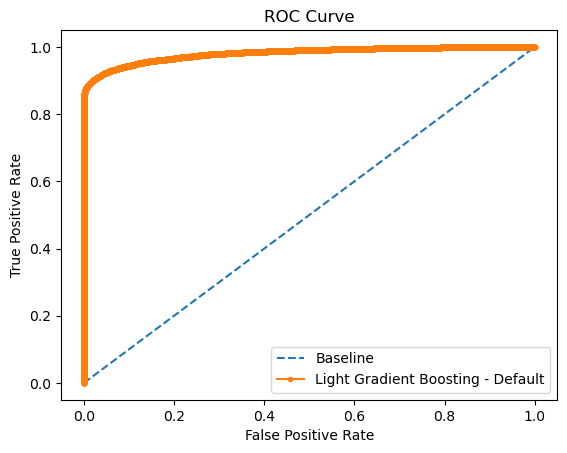

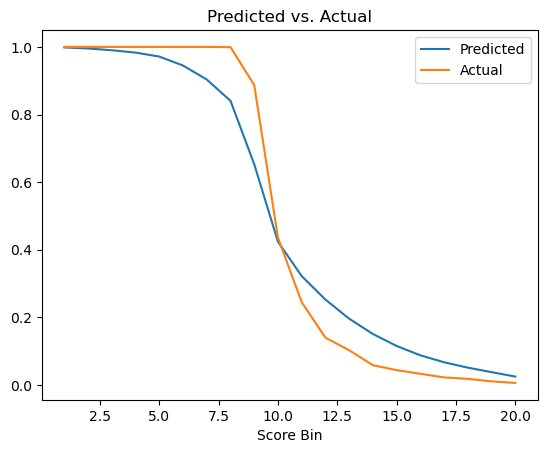

In [206]:
# 6) Light Gradint Boosting
model=GradientBoostingClassifier()
model.fit(x_train, y_train)
preds=model.predict(x_test)
probs=model.predict_proba(x_test)
actuals=y_test
model_name='Light Gradient Boosting - Default'

LGB=model_evaluation()

Accuracy: 0.987
Precision: 1.000
Recall: 0.973
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     30721
           1       1.00      0.97      0.99     30721

    accuracy                           0.99     61442
   macro avg       0.99      0.99      0.99     61442
weighted avg       0.99      0.99      0.99     61442

Baseline: ROC AUC = 0.500
XGBoost - Default: ROC AUC = 0.993


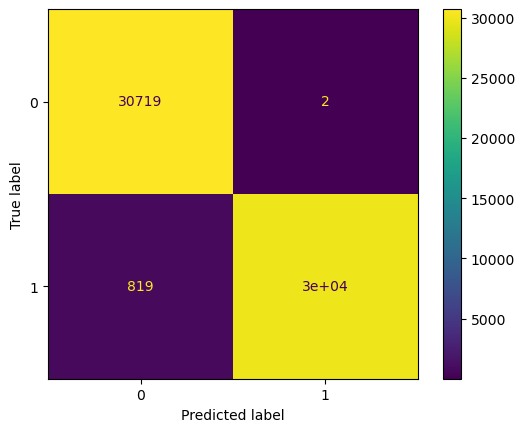

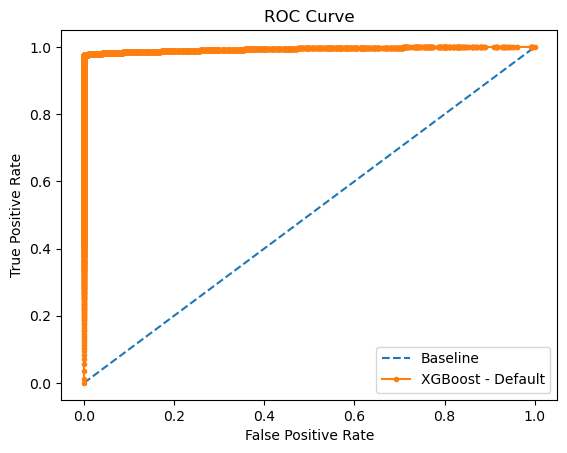

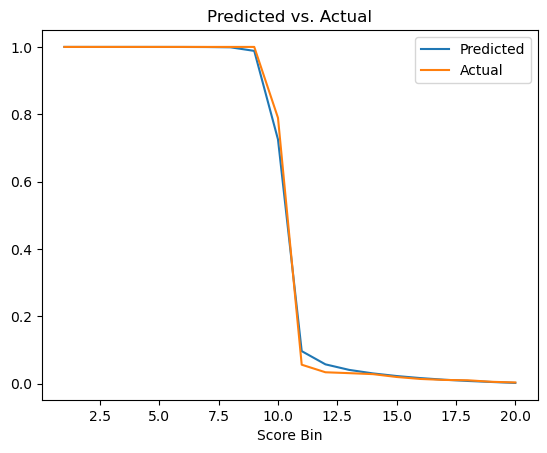

In [209]:
# 7) XGboost
model=XGBClassifier()
model.fit(x_train, y_train)
preds=model.predict(x_test)
probs=model.predict_proba(x_test)
actuals=y_test
model_name='XGBoost - Default'

XGB=model_evaluation()

Accuracy: 0.980
Precision: 0.991
Recall: 0.969
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     30721
           1       0.99      0.97      0.98     30721

    accuracy                           0.98     61442
   macro avg       0.98      0.98      0.98     61442
weighted avg       0.98      0.98      0.98     61442

Baseline: ROC AUC = 0.500
Random Forest - Default: ROC AUC = 0.996


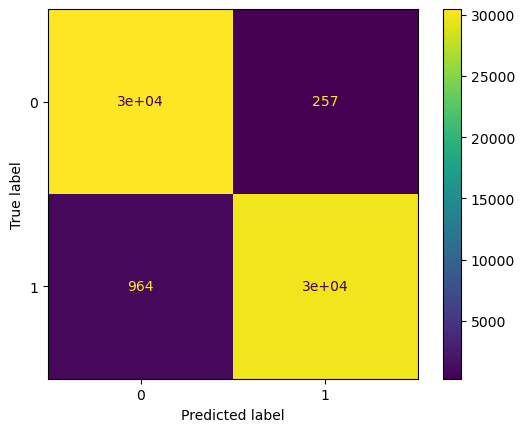

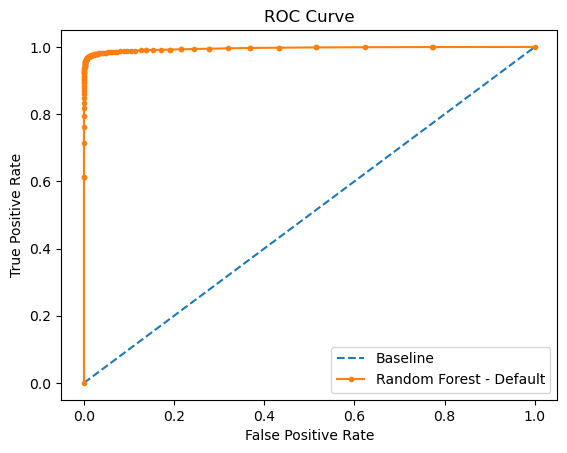

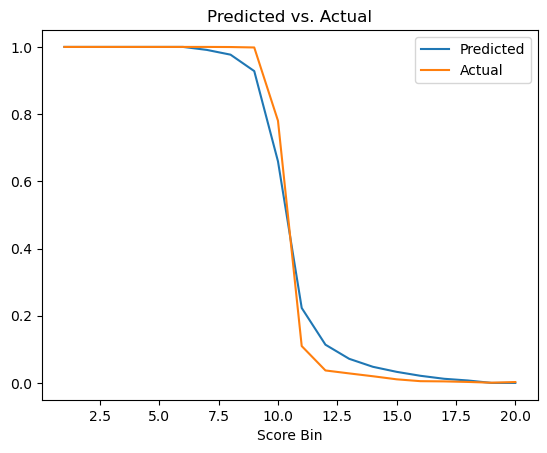

In [212]:
# 8) Random Forest
model=RandomForestClassifier()
model.fit(x_train, y_train)
preds=model.predict(x_test)
probs=model.predict_proba(x_test)
actuals=y_test
model_name='Random Forest - Default'

RF=model_evaluation()

Accuracy: 0.980
Precision: 0.991
Recall: 0.969
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     30721
           1       0.99      0.97      0.98     30721

    accuracy                           0.98     61442
   macro avg       0.98      0.98      0.98     61442
weighted avg       0.98      0.98      0.98     61442

Baseline: ROC AUC = 0.500
Ensemble Learning - Weighted Average: ROC AUC = 0.996


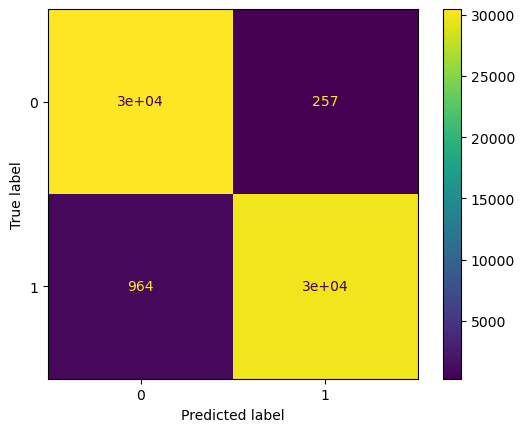

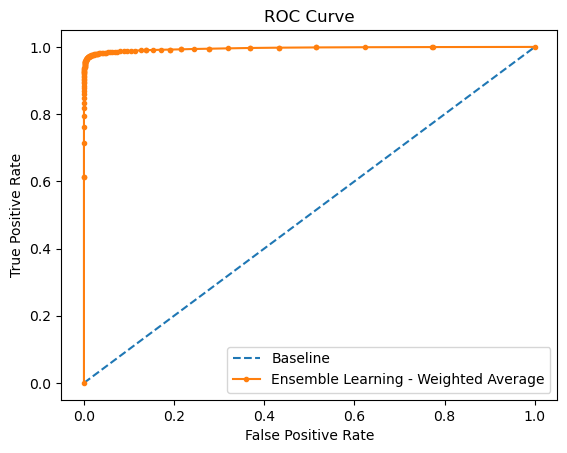

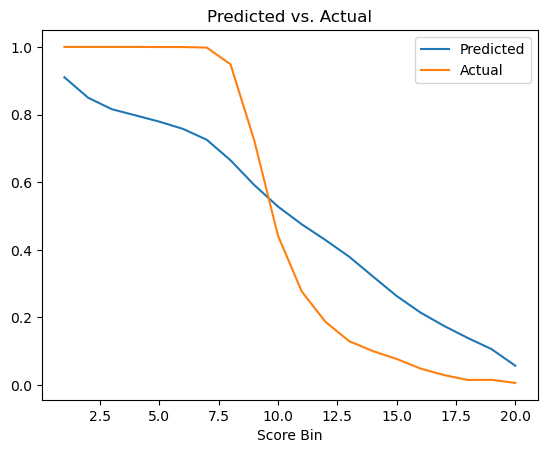

In [214]:
model_LR  = LogisticRegression()
model_DT  = DecisionTreeClassifier(max_depth = 3, random_state = 101, max_features = None, min_samples_leaf = 3)
model_NB  = GaussianNB()
model_KNN = KNeighborsClassifier(n_neighbors=15)
model_LGB = GradientBoostingClassifier()
model_XGB = XGBClassifier()
model_RF  = RandomForestClassifier()

model_LR.fit(x_train, y_train)
model_DT.fit(x_train, y_train)
model_NB.fit(x_train, y_train)
model_KNN.fit(x_train, y_train)
model_LGB.fit(x_train, y_train)
model_XGB.fit(x_train, y_train)
model_RF.fit(x_train, y_train)

Prob_LR  = model_LR.predict_proba(x_test)
Prob_DT  = model_DT.predict_proba(x_test)
Prob_NB  = model_NB.predict_proba(x_test)
Prob_KNN = model_KNN.predict_proba(x_test)
Prob_LGB = model_LGB.predict_proba(x_test)
Prob_XGB = model_XGB.predict_proba(x_test)
Prob_RF  = model_RF.predict_proba(x_test)

# Use weight_exponent to reward the algorithms with higher ROC
weight_exponent = 2

w1 = LR**weight_exponent
w2 = DT**weight_exponent
w3 = NB**weight_exponent
w5 = KNN**weight_exponent
w6 = LGB**weight_exponent
w7 = XGB**weight_exponent
w8 = RF**weight_exponent

probs = (Prob_LR*w1 + Prob_DT*w2 + Prob_LGB*w6) / (w1+w2+w6)

actuals = y_test
model_name = "Ensemble Learning - Weighted Average"

EL_weighted_average = model_evaluation()

In [215]:
# append prepayment score with LOAN ID
default_score=pd.DataFrame(probs, columns=['score1', 'score2']).reset_index()
LOAN_ID=df_select[df_select['seg']=='val']['LOAN_ID'].reset_index()

default_file=pd.DataFrame({'LOAN_ID': LOAN_ID['LOAN_ID'], 'Predicted_default': default_score['score2']})
default_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61442 entries, 0 to 61441
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LOAN_ID            41958 non-null  float64
 1   Predicted_default  61442 non-null  float64
dtypes: float64(2)
memory usage: 960.2 KB


In [216]:
default_file

,LOAN_ID,Predicted_default
0,98836744.0,0.046741
1,98836862.0,0.254154
2,98836951.0,0.059987
3,98837067.0,0.401429
4,98837074.0,0.531754
...,...,...
61437,NaN,0.484286
61438,NaN,0.806211
61439,NaN,0.930661
61440,NaN,0.788967


### Step 9: Combine two scores

In [217]:
two_scores=pd.merge(prepay_file, default_file, on='LOAN_ID', how='inner')
two_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41958 entries, 0 to 41957
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LOAN_ID            41958 non-null  int64  
 1   Predicted_prepay   41958 non-null  float64
 2   Predicted_default  41958 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 1.3 MB


In [218]:
two_scores['prepay_bin']  = pd.qcut(two_scores['Predicted_prepay'], q=5)
two_scores['default_bin'] = pd.qcut(two_scores['Predicted_default'], q=5)
two_scores

,LOAN_ID,Predicted_prepay,Predicted_default,prepay_bin,default_bin
0,98836744,0.536365,0.046741,"(0.467, 0.55]","(0.0166, 0.194]"
1,98836862,0.372089,0.254154,"(0.143, 0.38]","(0.194, 0.405]"
2,98836951,0.306317,0.059987,"(0.143, 0.38]","(0.0166, 0.194]"
3,98837067,0.659714,0.401429,"(0.644, 0.858]","(0.194, 0.405]"
4,98837074,0.380975,0.531754,"(0.38, 0.467]","(0.405, 0.626]"
...,...,...,...,...,...
41953,99520260,0.737878,0.591975,"(0.644, 0.858]","(0.405, 0.626]"
41954,99520330,0.468094,0.802939,"(0.467, 0.55]","(0.788, 0.981]"
41955,99520391,0.504948,0.810418,"(0.467, 0.55]","(0.788, 0.981]"
41956,99520412,0.571648,0.732851,"(0.55, 0.644]","(0.626, 0.788]"


In [220]:
check_rate = pd.merge(two_scores, df_nodup, on='LOAN_ID', how='inner')
check_rate

,LOAN_ID,Predicted_prepay,Predicted_default,prepay_bin,default_bin,index,POOL_ID,ACT_PERIOD,CHANNEL,SELLER,...,bad,prepaid,purpose_rate_refi,purpose_cashout_refi,property_pud,property_condo,property_other,term_30years,term_15years,mi
0,98836744,0.536365,0.046741,"(0.467, 0.55]","(0.0166, 0.194]",9,NaN,12020,R,Other,...,0,0,1,0,0,0,0,0,0,0
1,98836862,0.372089,0.254154,"(0.143, 0.38]","(0.194, 0.405]",62,NaN,12020,C,"NationStar Mortgage, LLC",...,0,0,0,0,1,0,0,1,0,1
2,98836951,0.306317,0.059987,"(0.143, 0.38]","(0.0166, 0.194]",72,NaN,12020,B,"United Shore Financial Services, LLC dba Unite...",...,0,0,0,0,0,1,0,1,0,1
3,98837067,0.659714,0.401429,"(0.644, 0.858]","(0.194, 0.405]",131,NaN,12020,R,Other,...,0,0,1,0,0,0,0,1,0,1
4,98837074,0.380975,0.531754,"(0.38, 0.467]","(0.405, 0.626]",152,NaN,12020,R,Other,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41953,99520260,0.737878,0.591975,"(0.644, 0.858]","(0.405, 0.626]",484930,NaN,32020,B,"United Shore Financial Services, LLC dba Unite...",...,0,0,0,0,1,0,0,1,0,0
41954,99520330,0.468094,0.802939,"(0.467, 0.55]","(0.788, 0.981]",484973,NaN,32020,R,PennyMac Corp.,...,0,0,1,0,1,0,0,1,0,0
41955,99520391,0.504948,0.810418,"(0.467, 0.55]","(0.788, 0.981]",484991,NaN,32020,B,"United Shore Financial Services, LLC dba Unite...",...,0,0,0,0,0,0,0,1,0,1
41956,99520412,0.571648,0.732851,"(0.55, 0.644]","(0.626, 0.788]",485009,NaN,32020,R,Other,...,0,0,1,0,1,0,0,1,0,0


In [221]:
interest_rate = check_rate.pivot_table(index='prepay_bin', 
                                       columns='default_bin', 
                                       values='ORIG_RATE', aggfunc='mean', dropna=False)
interest_rate

default_bin,"(0.0166, 0.194]","(0.194, 0.405]","(0.405, 0.626]","(0.626, 0.788]","(0.788, 0.981]"
prepay_bin,,,,,
"(0.143, 0.38]",3.945022,3.945922,3.932535,3.954013,3.936501
"(0.38, 0.467]",3.848112,3.854455,3.829919,3.836243,3.842552
"(0.467, 0.55]",3.791932,3.801954,3.786156,3.770759,3.780506
"(0.55, 0.644]",3.772004,3.744836,3.745445,3.745813,3.738105
"(0.644, 0.858]",3.717289,3.715734,3.720903,3.718970,3.736444


Text(95.72222222222221, 0.5, 'Prepayment Score')

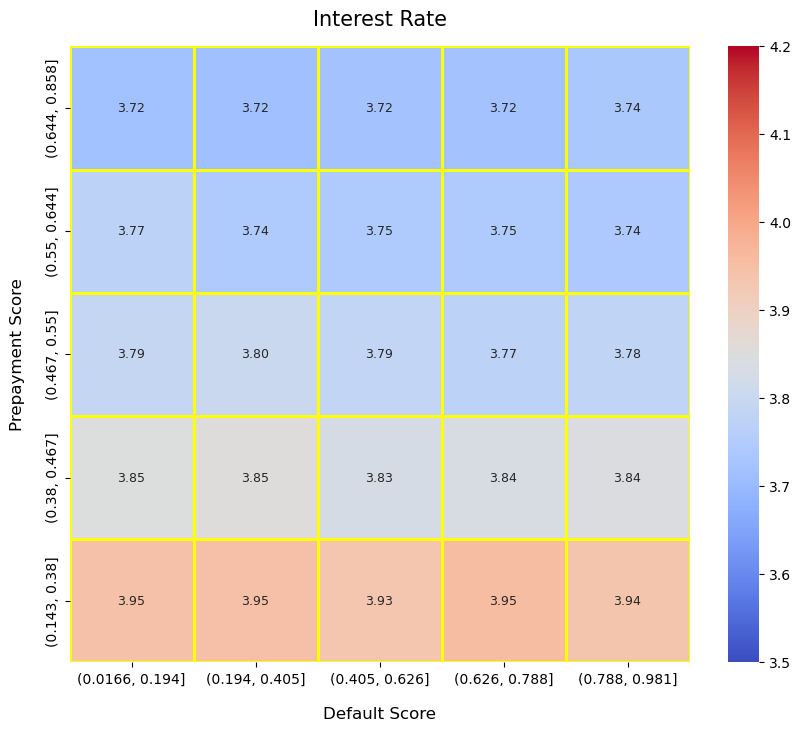

In [222]:
fig=plt.figure(figsize=(10, 8))
ax=plt.axes()
sns.heatmap(interest_rate, cmap='coolwarm', fmt=".2f", vmin=3.5, vmax=4.2, linewidths=2, linecolor='yellow',
            annot=True, annot_kws={"size": 9}).invert_yaxis()
ax.set_title("Interest Rate", fontsize=15, pad=15)
ax.set_xlabel('Default Score', fontsize=12, labelpad=15)
ax.set_ylabel('Prepayment Score', fontsize=12, labelpad=15)

In [223]:
# let's check by loan term

# 30-year fixed
interest_rate = check_rate[check_rate['ORIG_TERM']==360].pivot_table(index='prepay_bin', 
                                                                     columns='default_bin', 
                                                                     values='ORIG_RATE', aggfunc='mean', 
                                                                     dropna=False)
interest_rate

default_bin,"(0.0166, 0.194]","(0.194, 0.405]","(0.405, 0.626]","(0.626, 0.788]","(0.788, 0.981]"
prepay_bin,,,,,
"(0.143, 0.38]",4.093934,4.112100,4.114759,4.117636,4.128669
"(0.38, 0.467]",3.978462,3.977513,3.951101,3.968403,3.969524
"(0.467, 0.55]",3.891101,3.905087,3.900259,3.892869,3.910892
"(0.55, 0.644]",3.856932,3.850355,3.855279,3.845158,3.841121
"(0.644, 0.858]",3.810908,3.787822,3.798655,3.806137,3.815766


Text(95.72222222222221, 0.5, 'Prepayment Score')

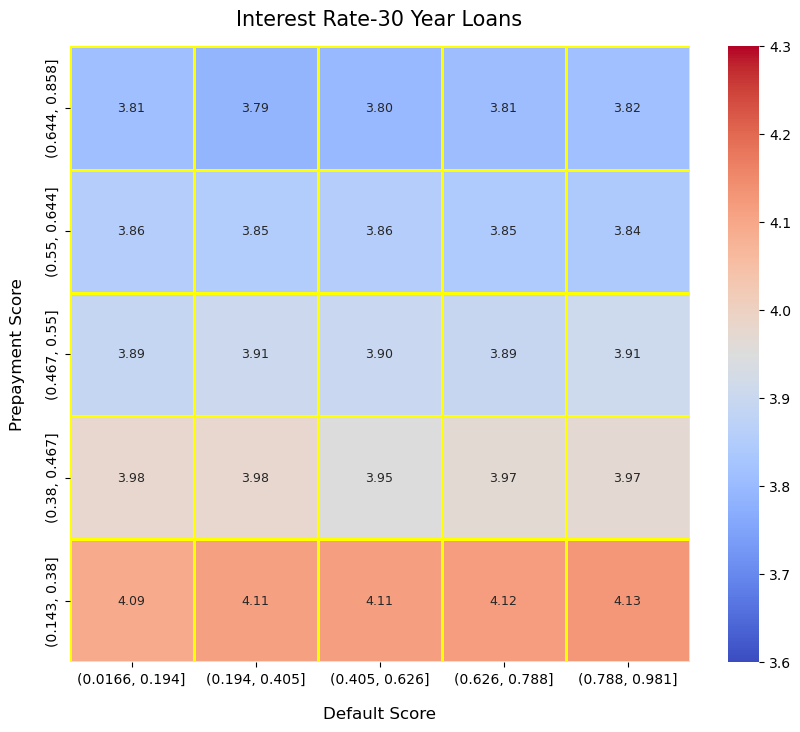

In [224]:
fig=plt.figure(figsize=(10, 8))
ax=plt.axes()
sns.heatmap(interest_rate, cmap='coolwarm', fmt=".2f", vmin=3.6, vmax=4.3, linewidths=2, linecolor='yellow',
            annot=True, annot_kws={"size": 9}).invert_yaxis()
ax.set_title("Interest Rate-30 Year Loans", fontsize=15, pad=15)
ax.set_xlabel('Default Score', fontsize=12, labelpad=15)
ax.set_ylabel('Prepayment Score', fontsize=12, labelpad=15)

In [225]:
# 15-year fixed
interest_rate=check_rate[check_rate['ORIG_TERM']==180].pivot_table(index='prepay_bin', columns='default_bin', 
                                                                   values='ORIG_RATE', aggfunc='mean', dropna=False)
interest_rate

default_bin,"(0.0166, 0.194]","(0.194, 0.405]","(0.405, 0.626]","(0.626, 0.788]","(0.788, 0.981]"
prepay_bin,,,,,
"(0.143, 0.38]",3.522943,3.490890,3.496352,3.491014,3.462340
"(0.38, 0.467]",3.363179,3.403708,3.374547,3.379513,3.354133
"(0.467, 0.55]",3.306681,3.301543,3.239451,3.292078,3.291143
"(0.55, 0.644]",3.264824,3.195363,3.237978,3.253344,3.219929
"(0.644, 0.858]",3.143207,3.138430,3.180392,3.148032,3.215000


Text(95.72222222222221, 0.5, 'Prepayment Score')

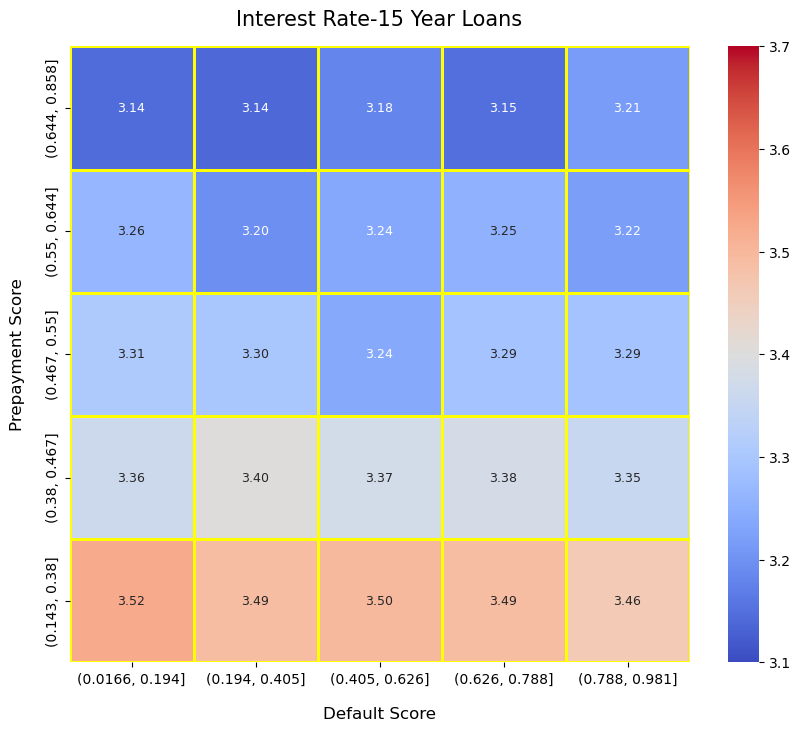

In [226]:
fig=plt.figure(figsize=(10, 8))
ax=plt.axes()
sns.heatmap(interest_rate, cmap='coolwarm', fmt=".2f", vmin=3.1, vmax=3.7, linewidths=2, linecolor='yellow',
            annot=True, annot_kws={"size": 9}).invert_yaxis()
ax.set_title("Interest Rate-15 Year Loans", fontsize=15, pad=15)
ax.set_xlabel('Default Score', fontsize=12, labelpad=15)
ax.set_ylabel('Prepayment Score', fontsize=12, labelpad=15)